# (Nouaman, 2024) videos

# Part 2: create bbox for full images

|Goal|Create a dataset of original images, with associated labels (croissants, slippers, other)|
|--|--|
|Method|Take a reference frame (empty), for all frames, each part of the frame that is different must be a cell|
|Slipper type inference|Slippers have a tail (#pixels at left > #pixels at right). All other cells are others|
|Croissant type inference|All cells are croissants by default|

(*"#" means "number of"*)

💡 Idea for croissant type inference: croissant must be symetric 
(will prevent from having slippers, if for any reason a slipper is present in croisant videos)

## Load params, reference frame number

In [1]:
import cv2
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

from omegaconf import DictConfig, OmegaConf
from hydra import initialize, compose

with initialize(config_path="../conf", version_base="1.3"):
    cfg = compose(config_name="config_data_creation_microfluidic_device")
    print(OmegaConf.to_yaml(cfg))

import sys, importlib
sys.path.append('../')
from scripts import metadata
importlib.reload(metadata)
from scripts import metadata as mda

from scripts import cellpose
importlib.reload(cellpose);

# ─────────────────────────────────────────────────────────────────────────────────
# PARAMETERS

# ==================================================
# 🔥🔥🔥 CHANGE THIS BASED ON THE VIDEO TYPE 🔥🔥🔥
CELL_TYPE = 'croissant'
ORIENTATION = 'L' # L for left: cells are going TO the left
# ==================================================

DONOR_NAME = "blood_donor_1"
VIDEO_NAME = "1000_mbar_400_fps_20200214_105325.avi"
BACKGROUND_FRAME_IDX = 21 
#VIDEO_NAME = "0100_mbar_100_fps.avi"
#BACKGROUND_FRAME_IDX = 44

"""
DONOR_NAME = "blood_donor_2"
VIDEO_NAME = "1000_mbar_400_fps_20200530_140558.avi"
BACKGROUND_FRAME_IDX = 3

DONOR_NAME = "blood_donor_3"
VIDEO_NAME = "1000_mbar_400_fps_20200527_122902.avi"
BACKGROUND_FRAME_IDX = 18
"""

VIDEO_PATH = os.path.join(cfg.paths.root_abs, cfg.paths.nouaman_videos_from_root, DONOR_NAME, VIDEO_NAME)

OUTPUT_DIR_img = os.path.join(cfg.paths.root_abs, cfg.paths.constructed_dataset_test, "images")
OUTPUT_DIR_labels = os.path.join(cfg.paths.root_abs, cfg.paths.constructed_dataset_test, "labels")
os.makedirs(OUTPUT_DIR_img, exist_ok=True)
os.makedirs(OUTPUT_DIR_labels, exist_ok=True)

paths:
  root_abs: /home/alex/dev/python/tx_rbc/tx_shared/
  data_from_notebooks: ../data/
  constructed_dataset: data/constructed_datasets/copy_paste_microfluidic
  constructed_dataset_randompos: data/constructed_datasets/copy_paste_random_pos
  constructed_dataset_test: data/constructed_datasets/copy_paste_microfluidic_test
  liang_2024_from_root: data/2024_liang
  kihm_2018_from_root: data/2018_plos
  nouaman_from_root: data/2024_nouaman
  nouaman_videos_from_root: data/videos/nouaman_2024
  naples_tif_stack: data/tomaiuolo_naples
dataset_distribution:
  train_liang: 10
  train_nouaman: 80
  train_kihm: 70
  test_liang: 90
  test_nouaman: 10
  test_kihm: 15
  val_liang: 0
  val_nouaman: 10
  val_kihm: 15
factors:
  noise_fn:
  - none
  - gaussian
  - salt_pepper
  - random
  croissant_count:
  - 1
  - 2
  slipper_count:
  - 1
  - 2
  object_count:
  - 1
  - 2
  lines:
  - true
  - false
  artifacts:
  - true
  - false
  channel_state:
  - lighten_channel
  - darken_channel
  - norma

#### Step 1: found proper frame to consider as background

First frame of videos has cells, we want a frame with no cells. So the following plots frames one by one for us to take the one with no cell as reference background frame.

Video has 32225 frames
Controls:
  ENTER - Next frame
  'b' + ENTER - Go back one frame
  'j' + ENTER - Jump to specific frame
  's' + ENTER - Save current frame as background reference
  'q' + ENTER - Quit



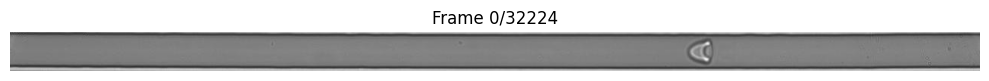

Frame 0/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


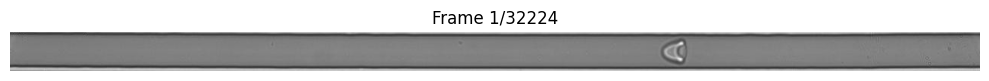

Frame 1/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


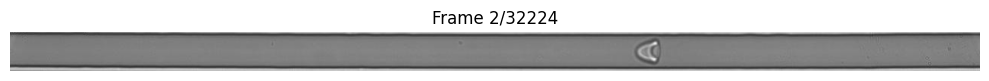

Frame 2/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


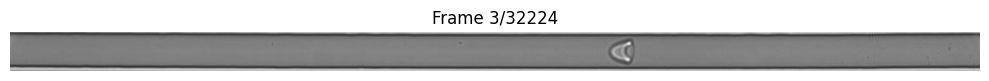

Frame 3/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


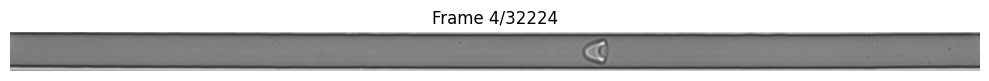

Frame 4/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


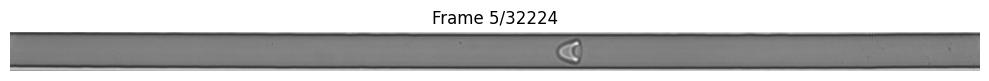

Frame 5/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


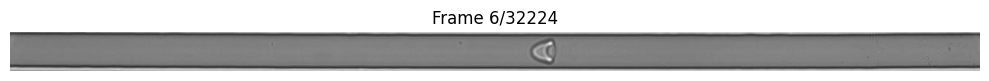

Frame 6/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


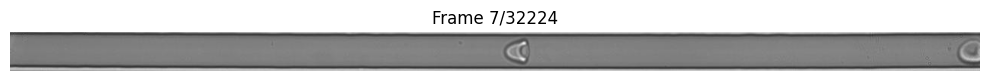

Frame 7/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


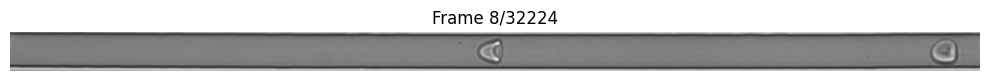

Frame 8/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


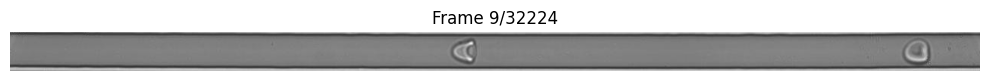

Frame 9/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


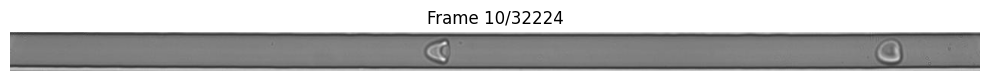

Frame 10/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


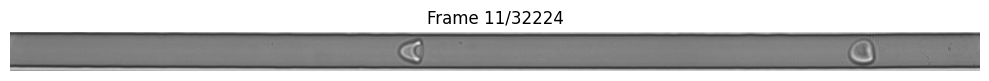

Frame 11/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


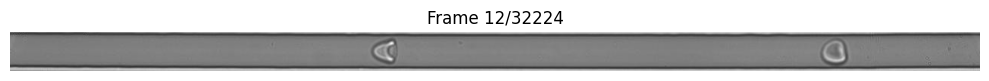

Frame 12/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


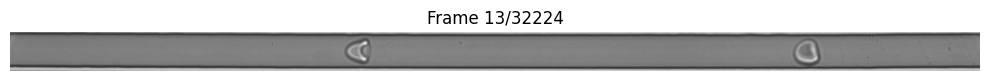

Frame 13/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


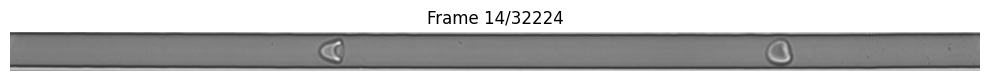

Frame 14/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


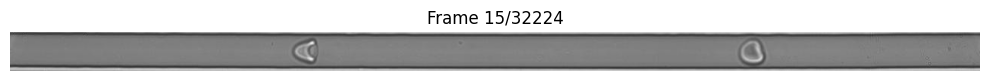

Frame 15/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


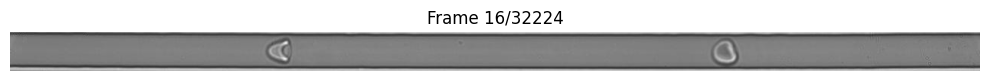

Frame 16/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


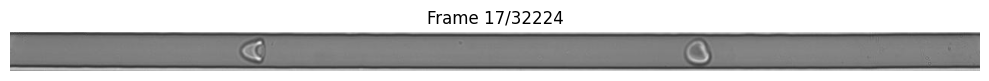

Frame 17/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


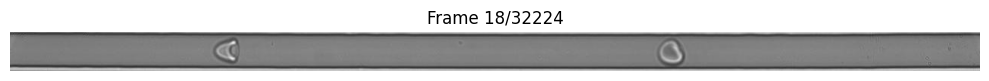

Frame 18/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


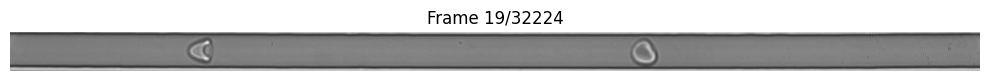

Frame 19/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


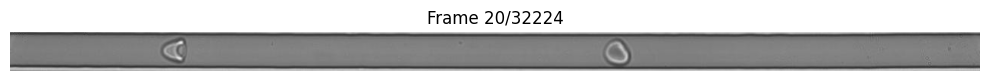

Frame 20/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


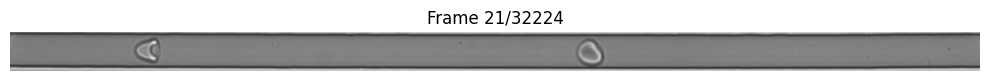

Frame 21/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


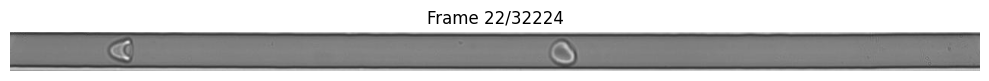

Frame 22/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


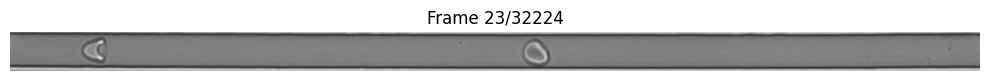

Frame 23/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


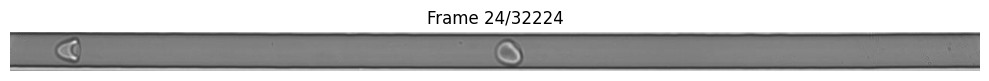

Frame 24/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


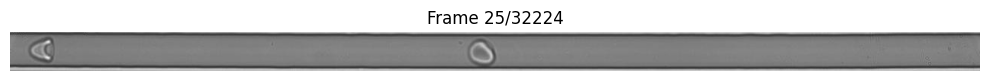

Frame 25/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


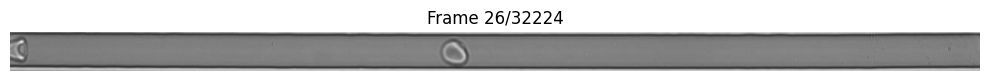

Frame 26/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


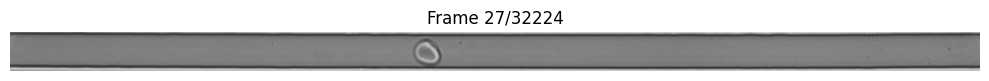

Frame 27/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


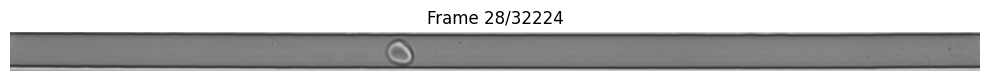

Frame 28/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


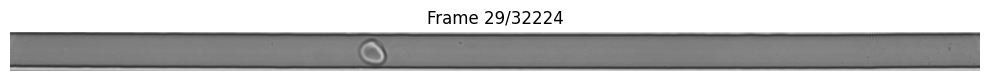

Frame 29/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


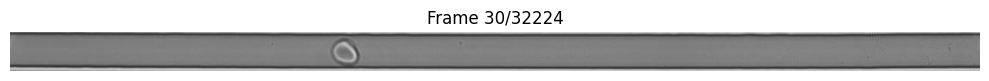

Frame 30/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


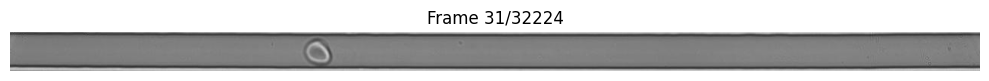

Frame 31/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


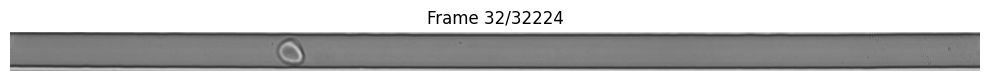

Frame 32/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


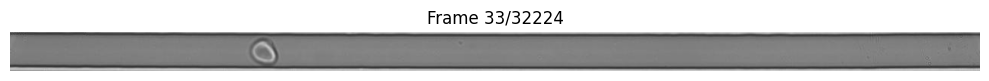

Frame 33/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


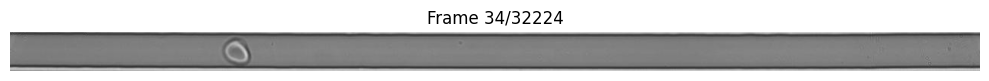

Frame 34/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


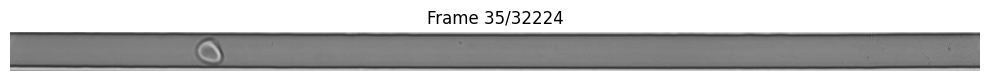

Frame 35/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


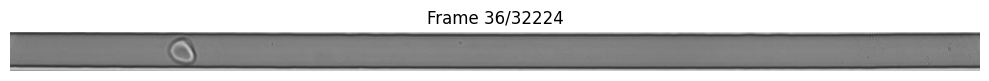

Frame 36/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


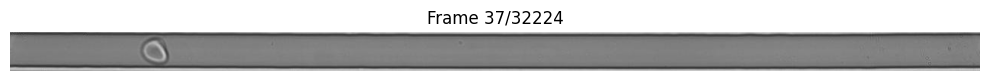

Frame 37/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


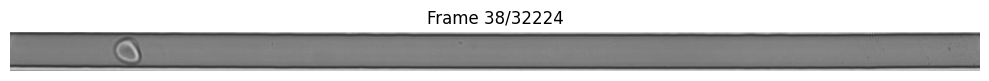

Frame 38/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


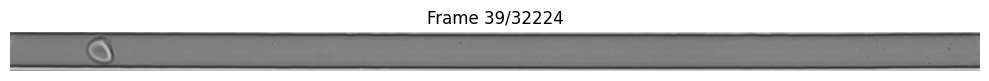

Frame 39/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


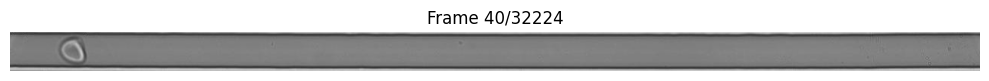

Frame 40/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


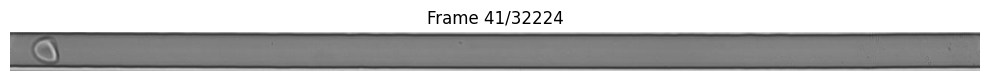

Frame 41/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


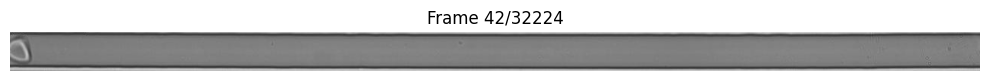

Frame 42/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


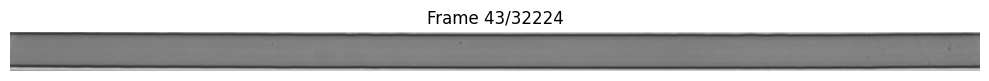

Frame 43/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


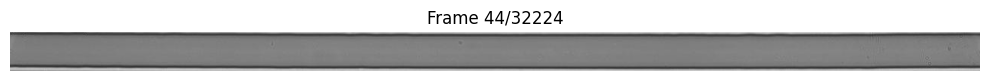

Frame 44/32224


KeyboardInterrupt: Interrupted by user

In [37]:
import cv2
import matplotlib.pyplot as plt
import os

def main():
    # Open the video
    cap = cv2.VideoCapture(VIDEO_PATH)
    if not cap.isOpened():
        raise RuntimeError(f"Could not open {VIDEO_PATH!r}")

    nb_total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Video has {nb_total_frames} frames")
    print("Controls:")
    print("  ENTER - Next frame")
    print("  'b' + ENTER - Go back one frame")
    print("  'j' + ENTER - Jump to specific frame")
    print("  's' + ENTER - Save current frame as background reference")
    print("  'q' + ENTER - Quit")
    print()

    frame_idx = 0
    saved_background = False

    while True:
        # Read current frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()
        if not ret:
            print("End of video reached")
            break

        # Convert BGR to RGB for matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Display frame
        plt.figure(figsize=(10, 8))
        plt.imshow(frame_rgb)
        plt.title(f"Frame {frame_idx}/{nb_total_frames-1}")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
        print(f"Frame {frame_idx}/{nb_total_frames-1}")
        
        # Wait for user input
        user_input = input("Enter command (ENTER=next, b=back, j=jump, s=save, q=quit): ").strip().lower()
        
        if user_input == 'q':
            break
        elif user_input == '' or user_input == 'n':  # Enter or 'n' for next
            frame_idx += 1
            if frame_idx >= nb_total_frames:
                print("Reached end of video")
                frame_idx = nb_total_frames - 1
        elif user_input == 'b':  # Back
            frame_idx -= 1
            if frame_idx < 0:
                frame_idx = 0
        elif user_input == 'j':  # Jump to frame
            try:
                target_frame = int(input("Enter frame number: "))
                if 0 <= target_frame < nb_total_frames:
                    frame_idx = target_frame
                else:
                    print(f"Frame must be between 0 and {nb_total_frames-1}")
            except ValueError:
                print("Invalid frame number")
        elif user_input == 's':  # Save background
            bg_filename = f"background_frame_{frame_idx:05d}.png"
            # Save in BGR format (original cv2 format)
            cv2.imwrite(bg_filename, frame)
            print(f"Saved background frame as: {bg_filename}")
            saved_background = True

    cap.release()
    
    if saved_background:
        print("\nBackground frame saved! Use this frame number in the detection script.")
    else:
        print(f"\nRecommendation: Choose a frame with minimal objects (like frame 0) as background.")

if __name__ == "__main__":
    main()

### Step 2: find cells

1. Find cells
2. Filter them
3. Create labels
4. Save frame to image dir, labels to labels dir

Video has 32225 frames
Processing frames with parameters:
  Difference threshold: 30
  Min contour area: 100
  Max contour area: 50000
  Skip frames: 1
  Edge buffer columns: 100
  Logic: Save only fully entered objects, then wait for clear frame

Frame     0: NEW batch detected → saved 1 fully entered objects
Frame     1: Fully entered objects still present (waiting for clear frame)
Frame     2: Fully entered objects still present (waiting for clear frame)
Frame     3: Fully entered objects still present (waiting for clear frame)
Frame     4: Fully entered objects still present (waiting for clear frame)
Frame     5: Fully entered objects still present (waiting for clear frame)
Frame     6: Fully entered objects still present (waiting for clear frame)
Frame     7: Object not fully entered (too_close_to_right_edge)
Frame     7: Fully entered objects still present (waiting for clear frame)
Frame     8: Object not fully entered (too_close_to_right_edge)
Frame     8: Fully entered objects 

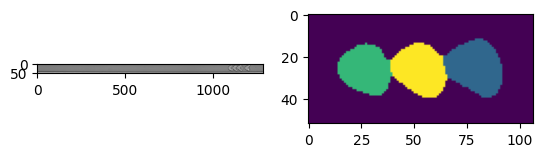

##################
Had 3 objects, saved 3:
(1136, 12, 1164, 40) 0
(1086, 14, 1112, 39) 0
(1111, 14, 1138, 40) 0
##################
Frame   659: NEW batch detected → saved 3 fully entered objects
Frame   660: Object not fully entered (left_edge_not_clear)
Frame   660: Fully entered objects still present (waiting for clear frame)
Frame   661: Object not fully entered (left_edge_not_clear)
Frame   661: Fully entered objects still present (waiting for clear frame)
Frame   662: Object not fully entered (left_edge_not_clear)
Frame   662: Fully entered objects still present (waiting for clear frame)
Frame   663: Object not fully entered (left_edge_not_clear)
Frame   663: Fully entered objects still present (waiting for clear frame)
Frame   664: Object not fully entered (left_edge_not_clear)
Frame   664: Fully entered objects still present (waiting for clear frame)
Frame   665: Object not fully entered (left_edge_not_clear)
Frame   665: Object not fully entered (too_close_to_right_edge)
Frame 

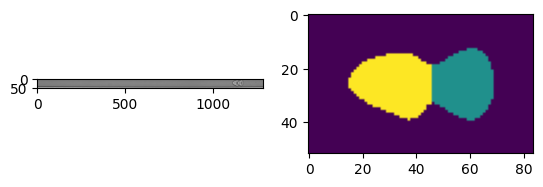

##################
Had 2 objects, saved 2:
(1142, 13, 1165, 40) 0
(1111, 15, 1142, 40) 0
##################
Frame   741: NEW batch detected → saved 2 fully entered objects
Frame   742: Fully entered objects still present (waiting for clear frame)
Frame   743: Fully entered objects still present (waiting for clear frame)
Frame   744: Fully entered objects still present (waiting for clear frame)
Frame   745: Object not fully entered (too_close_to_right_edge)
Frame   745: Fully entered objects still present (waiting for clear frame)
Frame   746: Object not fully entered (too_close_to_right_edge)
Frame   746: Fully entered objects still present (waiting for clear frame)
Frame   747: Object not fully entered (too_close_to_right_edge)
Frame   747: Fully entered objects still present (waiting for clear frame)
Frame   748: Object not fully entered (too_close_to_right_edge)
Frame   748: Fully entered objects still present (waiting for clear frame)
Frame   749: Fully entered objects still presen

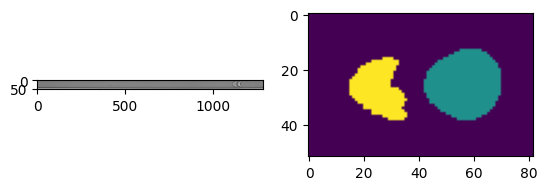

##################
Had 2 objects, saved 2:
(1137, 13, 1165, 39) 0
(1110, 16, 1131, 39) 0
##################
Frame  1060: NEW batch detected → saved 2 fully entered objects
Frame  1061: Fully entered objects still present (waiting for clear frame)
Frame  1062: Fully entered objects still present (waiting for clear frame)
Frame  1063: Object not fully entered (too_close_to_right_edge)
Frame  1063: Fully entered objects still present (waiting for clear frame)
Frame  1064: Object not fully entered (too_close_to_right_edge)
Frame  1064: Fully entered objects still present (waiting for clear frame)
Frame  1065: Object not fully entered (too_close_to_right_edge)
Frame  1065: Fully entered objects still present (waiting for clear frame)
Frame  1066: Object not fully entered (too_close_to_right_edge)
Frame  1066: Fully entered objects still present (waiting for clear frame)
Frame  1067: Fully entered objects still present (waiting for clear frame)
Frame  1068: Fully entered objects still presen

no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.


Frame  1550: Object not fully entered (too_close_to_left_edge)


no seeds found in get_masks_torch - no masks found.


Frame  1551: Object not fully entered (too_close_to_right_edge)
Frame  1551: Object not fully entered (too_close_to_right_edge)
Frame  1551: Object not fully entered (too_close_to_right_edge)
Frame  1551: Object not fully entered (too_close_to_right_edge)


no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.


Frame  1552: Object not fully entered (too_close_to_right_edge)
Frame  1552: Object not fully entered (too_close_to_right_edge)
Frame  1552: Object not fully entered (too_close_to_right_edge)


no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.


Frame  1553: Object not fully entered (too_close_to_right_edge)


no seeds found in get_masks_torch - no masks found.


Frame  1554: Object not fully entered (too_close_to_right_edge)
Frame  1554: Object not fully entered (too_close_to_right_edge)
Frame  1555: Object not fully entered (too_close_to_right_edge)
Frame  1555: Object not fully entered (too_close_to_left_edge)
Frame  1555: Object not fully entered (too_close_to_right_edge)
Frame  1555: No fully entered objects
Frame  1557: Object not fully entered (too_close_to_right_edge)
Frame  1558: Object not fully entered (too_close_to_right_edge)
Frame  1559: Object not fully entered (too_close_to_right_edge)
Frame  1570: No fully entered objects
Frame  1571: No fully entered objects
Frame  1572: No fully entered objects
Frame  1573: No fully entered objects
Frame  1574: No fully entered objects
Frame  1575: No fully entered objects
Frame  1576: No fully entered objects
Frame  1577: No fully entered objects
Frame  1578: No fully entered objects
Frame  1579: No fully entered objects
Frame  1580: No fully entered objects
Frame  1581: No fully entered obj

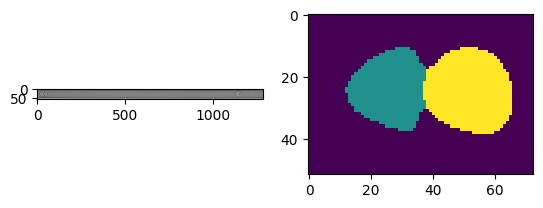

##################
Had 2 objects, saved 2:
(16, 11, 42, 38) 0
(41, 11, 70, 39) 0
##################
Frame  2903: NEW batch detected → saved 3 fully entered objects
Frame  2904: Object not fully entered (too_close_to_left_edge)
Frame  2904: Fully entered objects still present (waiting for clear frame)
Frame  2905: Fully entered objects still present (waiting for clear frame)
Frame  2906: Fully entered objects still present (waiting for clear frame)
Frame  2907: Fully entered objects still present (waiting for clear frame)
Frame  2908: Fully entered objects still present (waiting for clear frame)
Frame  2909: Fully entered objects still present (waiting for clear frame)
Frame  2910: Fully entered objects still present (waiting for clear frame)
Frame  2911: Fully entered objects still present (waiting for clear frame)
Frame  2912: Fully entered objects still present (waiting for clear frame)
Frame  2913: Fully entered objects still present (waiting for clear frame)
Frame  2914: Fully ente

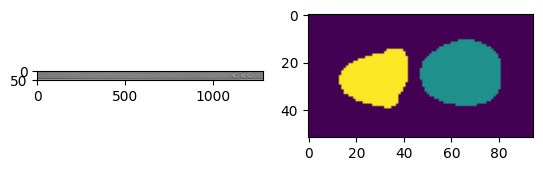

##################
Had 2 objects, saved 2:
(1190, 11, 1224, 39) 0
(1156, 15, 1185, 40) 0
##################
Frame  2942: NEW batch detected → saved 2 fully entered objects
Frame  2943: Object not fully entered (too_close_to_right_edge)
Frame  2943: Fully entered objects still present (waiting for clear frame)
Frame  2944: Object not fully entered (too_close_to_right_edge)
Frame  2944: Fully entered objects still present (waiting for clear frame)
Frame  2945: Object not fully entered (too_close_to_right_edge)
Frame  2945: Fully entered objects still present (waiting for clear frame)
Frame  2946: Object not fully entered (too_close_to_right_edge)
Frame  2946: Fully entered objects still present (waiting for clear frame)
Frame  2947: Object not fully entered (too_close_to_right_edge)
Frame  2947: Fully entered objects still present (waiting for clear frame)
Frame  2948: Fully entered objects still present (waiting for clear frame)
Frame  2949: Fully entered objects still present (waiting 

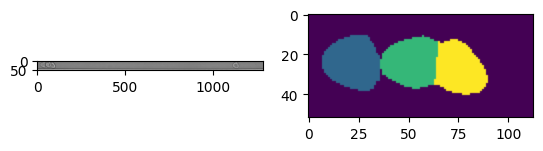

##################
Had 3 objects, saved 3:
(20, 11, 49, 39) 0
(49, 11, 78, 38) 0
(76, 13, 103, 41) 0
##################
Frame  3266: NEW batch detected → saved 4 fully entered objects
Frame  3267: Object not fully entered (too_close_to_left_edge)
Frame  3267: Fully entered objects still present (waiting for clear frame)
Frame  3268: Object not fully entered (too_close_to_left_edge)
Frame  3268: Fully entered objects still present (waiting for clear frame)
Frame  3269: Fully entered objects still present (waiting for clear frame)
Frame  3270: Fully entered objects still present (waiting for clear frame)
Frame  3271: Fully entered objects still present (waiting for clear frame)
Frame  3272: Fully entered objects still present (waiting for clear frame)
Frame  3273: Fully entered objects still present (waiting for clear frame)
Frame  3274: Fully entered objects still present (waiting for clear frame)
Frame  3275: Fully entered objects still present (waiting for clear frame)
Frame  3276: Fu

no seeds found in get_masks_torch - no masks found.


Frame  4377: No fully entered objects
Frame  4378: No fully entered objects
Frame  4379: No fully entered objects
Frame  4380: No fully entered objects
Frame  4381: No fully entered objects
Frame  4382: No fully entered objects
Frame  4383: No fully entered objects
Frame  4384: No fully entered objects
Frame  4385: Object not fully entered (too_close_to_right_edge)
Frame  4385: No fully entered objects
Frame  4386: Object not fully entered (too_close_to_right_edge)
Frame  4386: No fully entered objects
Frame  4387: Object not fully entered (too_close_to_right_edge)
Frame  4387: No fully entered objects
Frame  4388: Object not fully entered (too_close_to_right_edge)
Frame  4388: No fully entered objects
Frame  4389: NEW batch detected → saved 1 fully entered objects
Frame  4390: Fully entered objects still present (waiting for clear frame)
Frame  4391: Fully entered objects still present (waiting for clear frame)
Frame  4392: Fully entered objects still present (waiting for clear frame)

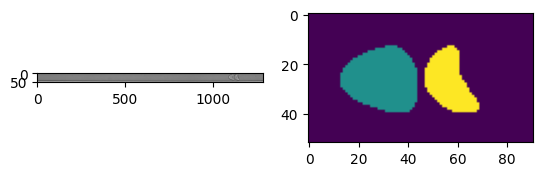

##################
Had 2 objects, saved 2:
(1087, 13, 1118, 40) 0
(1121, 13, 1143, 40) 0
##################
Frame  5304: NEW batch detected → saved 2 fully entered objects
Frame  5305: Fully entered objects still present (waiting for clear frame)
Frame  5306: Fully entered objects still present (waiting for clear frame)
Frame  5307: Fully entered objects still present (waiting for clear frame)
Frame  5308: Object not fully entered (too_close_to_right_edge)
Frame  5308: Fully entered objects still present (waiting for clear frame)
Frame  5309: Object not fully entered (too_close_to_right_edge)
Frame  5309: Fully entered objects still present (waiting for clear frame)
Frame  5310: Object not fully entered (too_close_to_right_edge)
Frame  5310: Fully entered objects still present (waiting for clear frame)
Frame  5311: Object not fully entered (too_close_to_right_edge)
Frame  5311: Object not fully entered (too_close_to_right_edge)
Frame  5311: Fully entered objects still present (waiting 

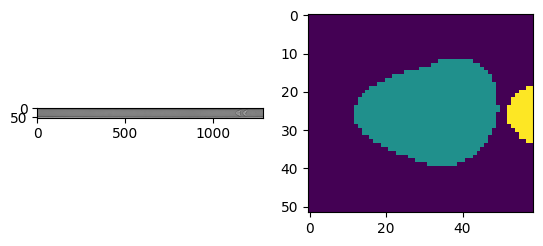

##################
Had 2 objects, saved 2:
(1127, 12, 1165, 40) 0
(1167, 19, 1174, 34) 0
##################
Frame  6287: NEW batch detected → saved 3 fully entered objects
Frame  6288: Fully entered objects still present (waiting for clear frame)
Frame  6289: Fully entered objects still present (waiting for clear frame)
Frame  6290: Fully entered objects still present (waiting for clear frame)
Frame  6291: Fully entered objects still present (waiting for clear frame)
Frame  6292: Fully entered objects still present (waiting for clear frame)
Frame  6293: Fully entered objects still present (waiting for clear frame)
Frame  6294: Fully entered objects still present (waiting for clear frame)
Frame  6295: Fully entered objects still present (waiting for clear frame)
Frame  6296: Fully entered objects still present (waiting for clear frame)
Frame  6297: Fully entered objects still present (waiting for clear frame)
Frame  6298: Fully entered objects still present (waiting for clear frame)
Fra

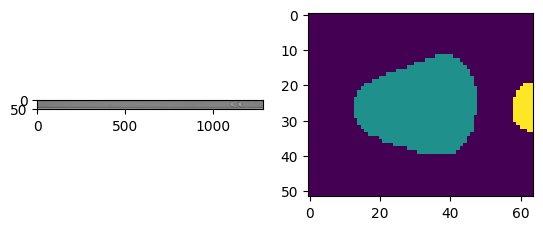

##################
Had 2 objects, saved 2:
(1096, 12, 1131, 40) 0
(1141, 20, 1147, 34) 0
##################
Frame  8694: NEW batch detected → saved 3 fully entered objects
Frame  8695: Fully entered objects still present (waiting for clear frame)
Frame  8696: Fully entered objects still present (waiting for clear frame)
Frame  8697: Fully entered objects still present (waiting for clear frame)
Frame  8698: Fully entered objects still present (waiting for clear frame)
Frame  8699: Fully entered objects still present (waiting for clear frame)
Progress: 8700/32225 frames processed, 99 batches saved
Frame  8700: Fully entered objects still present (waiting for clear frame)
Frame  8701: Fully entered objects still present (waiting for clear frame)
Frame  8702: Fully entered objects still present (waiting for clear frame)
Frame  8703: Fully entered objects still present (waiting for clear frame)
Frame  8704: Fully entered objects still present (waiting for clear frame)
Frame  8705: Fully ent

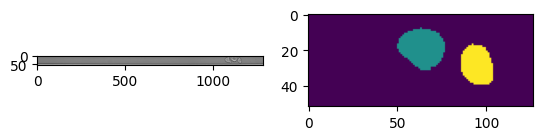

##################
Had 2 objects, saved 2:
(1103, 8, 1130, 32) 0
(1139, 17, 1157, 40) 0
##################
Frame 10689: NEW batch detected → saved 2 fully entered objects
Frame 10690: Fully entered objects still present (waiting for clear frame)
Frame 10691: Fully entered objects still present (waiting for clear frame)
Frame 10692: Fully entered objects still present (waiting for clear frame)
Frame 10693: Fully entered objects still present (waiting for clear frame)
Frame 10694: Fully entered objects still present (waiting for clear frame)
Frame 10695: Fully entered objects still present (waiting for clear frame)
Frame 10696: Fully entered objects still present (waiting for clear frame)
Frame 10697: Fully entered objects still present (waiting for clear frame)
Frame 10698: Fully entered objects still present (waiting for clear frame)
Frame 10699: Fully entered objects still present (waiting for clear frame)
Progress: 10700/32225 frames processed, 124 batches saved
Frame 10700: Fully en

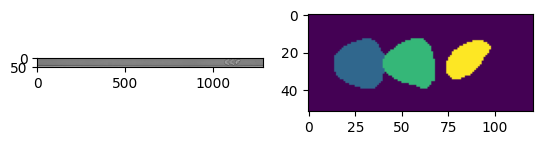

##################
Had 3 objects, saved 3:
(1064, 13, 1091, 40) 0
(1090, 13, 1118, 40) 0
(1124, 14, 1148, 35) 0
##################
Frame 11584: NEW batch detected → saved 3 fully entered objects
Frame 11585: Fully entered objects still present (waiting for clear frame)
Frame 11586: Fully entered objects still present (waiting for clear frame)
Frame 11587: Fully entered objects still present (waiting for clear frame)
Frame 11588: Fully entered objects still present (waiting for clear frame)
Frame 11589: Fully entered objects still present (waiting for clear frame)
Frame 11590: Fully entered objects still present (waiting for clear frame)
Frame 11591: Fully entered objects still present (waiting for clear frame)
Frame 11592: Fully entered objects still present (waiting for clear frame)
Frame 11593: Fully entered objects still present (waiting for clear frame)
Frame 11594: Fully entered objects still present (waiting for clear frame)
Frame 11595: Fully entered objects still present (waiti

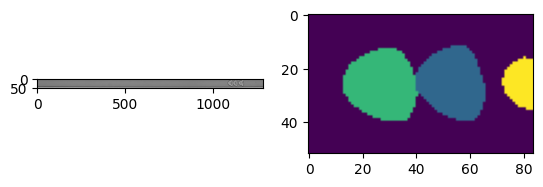

##################
Had 3 objects, saved 3:
(1110, 12, 1136, 40) 0
(1083, 13, 1111, 40) 0
(1142, 16, 1154, 36) 0
##################
Frame 13270: NEW batch detected → saved 3 fully entered objects
Frame 13271: Fully entered objects still present (waiting for clear frame)
Frame 13272: Fully entered objects still present (waiting for clear frame)
Frame 13273: Fully entered objects still present (waiting for clear frame)
Frame 13274: Fully entered objects still present (waiting for clear frame)
Frame 13275: Fully entered objects still present (waiting for clear frame)
Frame 13276: Fully entered objects still present (waiting for clear frame)
Frame 13277: Fully entered objects still present (waiting for clear frame)
Frame 13278: Fully entered objects still present (waiting for clear frame)
Frame 13279: Fully entered objects still present (waiting for clear frame)
Frame 13280: Fully entered objects still present (waiting for clear frame)
Frame 13281: Fully entered objects still present (waiti

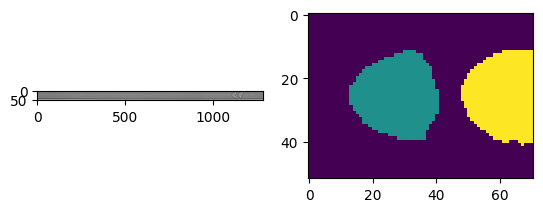

##################
Had 2 objects, saved 2:
(1106, 12, 1134, 40) 0
(1141, 12, 1164, 42) 0
##################
Frame 14417: NEW batch detected → saved 3 fully entered objects
Frame 14418: Fully entered objects still present (waiting for clear frame)
Frame 14419: Fully entered objects still present (waiting for clear frame)
Frame 14420: Fully entered objects still present (waiting for clear frame)
Frame 14421: Fully entered objects still present (waiting for clear frame)
Frame 14422: Fully entered objects still present (waiting for clear frame)
Frame 14423: Fully entered objects still present (waiting for clear frame)
Frame 14424: Fully entered objects still present (waiting for clear frame)
Frame 14425: Fully entered objects still present (waiting for clear frame)
Frame 14426: Fully entered objects still present (waiting for clear frame)
Frame 14427: Fully entered objects still present (waiting for clear frame)
Frame 14428: Fully entered objects still present (waiting for clear frame)
Fra

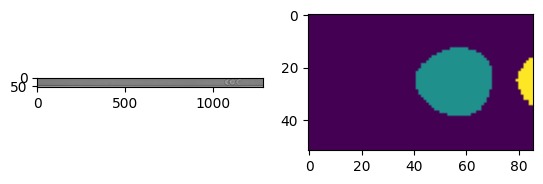

##################
Had 2 objects, saved 2:
(1091, 13, 1120, 39) 0
(1129, 17, 1136, 35) 0
##################
Frame 17405: NEW batch detected → saved 3 fully entered objects
Frame 17406: Fully entered objects still present (waiting for clear frame)
Frame 17407: Fully entered objects still present (waiting for clear frame)
Frame 17408: Fully entered objects still present (waiting for clear frame)
Frame 17409: Fully entered objects still present (waiting for clear frame)
Frame 17410: Fully entered objects still present (waiting for clear frame)
Frame 17411: Fully entered objects still present (waiting for clear frame)
Frame 17412: Fully entered objects still present (waiting for clear frame)
Frame 17413: Fully entered objects still present (waiting for clear frame)
Frame 17414: Fully entered objects still present (waiting for clear frame)
Frame 17415: Fully entered objects still present (waiting for clear frame)
Frame 17416: Fully entered objects still present (waiting for clear frame)
Fra

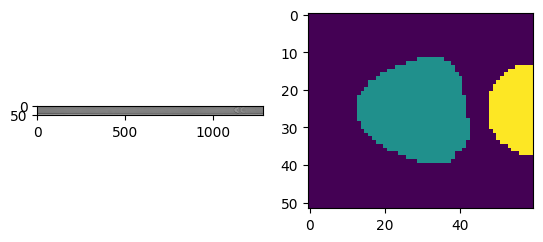

##################
Had 2 objects, saved 2:
(1118, 12, 1148, 40) 0
(1153, 14, 1165, 38) 0
##################
Frame 17493: NEW batch detected → saved 2 fully entered objects
Frame 17494: Fully entered objects still present (waiting for clear frame)
Frame 17495: Fully entered objects still present (waiting for clear frame)
Frame 17496: Fully entered objects still present (waiting for clear frame)
Frame 17497: Fully entered objects still present (waiting for clear frame)
Frame 17498: Fully entered objects still present (waiting for clear frame)
Frame 17499: Fully entered objects still present (waiting for clear frame)
Progress: 17500/32225 frames processed, 185 batches saved
Frame 17500: Fully entered objects still present (waiting for clear frame)
Frame 17501: Fully entered objects still present (waiting for clear frame)
Frame 17502: Fully entered objects still present (waiting for clear frame)
Frame 17503: Fully entered objects still present (waiting for clear frame)
Frame 17504: Fully e

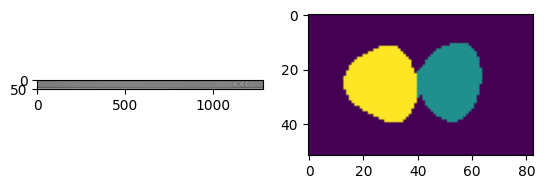

##################
Had 2 objects, saved 2:
(1176, 11, 1200, 40) 0
(1149, 12, 1176, 40) 0
##################
Frame 19135: NEW batch detected → saved 3 fully entered objects
Frame 19136: Object not fully entered (too_close_to_right_edge)
Frame 19136: Fully entered objects still present (waiting for clear frame)
Frame 19137: Fully entered objects still present (waiting for clear frame)
Frame 19138: Fully entered objects still present (waiting for clear frame)
Frame 19139: Fully entered objects still present (waiting for clear frame)
Frame 19140: Fully entered objects still present (waiting for clear frame)
Frame 19141: Fully entered objects still present (waiting for clear frame)
Frame 19142: Fully entered objects still present (waiting for clear frame)
Frame 19143: Fully entered objects still present (waiting for clear frame)
Frame 19144: Fully entered objects still present (waiting for clear frame)
Frame 19145: Fully entered objects still present (waiting for clear frame)
Frame 19146: F

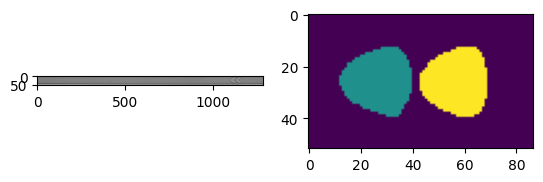

##################
Had 2 objects, saved 2:
(1098, 13, 1126, 40) 0
(1129, 13, 1155, 40) 0
##################
Frame 19293: NEW batch detected → saved 2 fully entered objects
Frame 19294: Fully entered objects still present (waiting for clear frame)
Frame 19295: Fully entered objects still present (waiting for clear frame)
Frame 19296: Fully entered objects still present (waiting for clear frame)
Frame 19297: Fully entered objects still present (waiting for clear frame)
Frame 19298: Fully entered objects still present (waiting for clear frame)
Frame 19299: Fully entered objects still present (waiting for clear frame)
Progress: 19300/32225 frames processed, 202 batches saved
Frame 19300: Fully entered objects still present (waiting for clear frame)
Frame 19301: Object not fully entered (too_close_to_right_edge)
Frame 19301: Fully entered objects still present (waiting for clear frame)
Frame 19302: Object not fully entered (too_close_to_right_edge)
Frame 19302: Fully entered objects still p

no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.


Frame 21265: Object not fully entered (too_close_to_left_edge)
Frame 21265: No fully entered objects
Frame 21266: Object not fully entered (too_close_to_left_edge)
Frame 21266: No fully entered objects
Frame 21267: Object not fully entered (too_close_to_left_edge)
Frame 21267: No fully entered objects
Frame 21268: Object not fully entered (too_close_to_left_edge)
Frame 21268: No fully entered objects
Frame 21269: No fully entered objects
Frame 21270: No fully entered objects
Frame 21271: No fully entered objects
Frame 21272: No fully entered objects
Frame 21273: No fully entered objects
Frame 21274: No fully entered objects
Frame 21275: No fully entered objects
Frame 21276: No fully entered objects
Frame 21277: No fully entered objects
Frame 21278: No fully entered objects
Frame 21279: No fully entered objects
Frame 21280: No fully entered objects
Frame 21281: No fully entered objects
Frame 21282: No fully entered objects
Frame 21283: No fully entered objects
Frame 21284: No fully ente

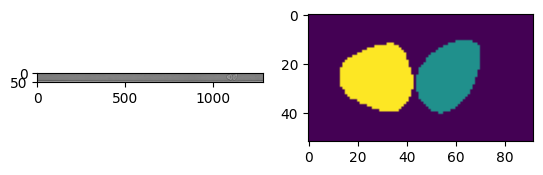

##################
Had 2 objects, saved 2:
(1107, 11, 1133, 41) 0
(1076, 12, 1106, 40) 0
##################
Frame 21888: NEW batch detected → saved 2 fully entered objects
Frame 21889: Fully entered objects still present (waiting for clear frame)
Frame 21890: Fully entered objects still present (waiting for clear frame)
Frame 21891: Fully entered objects still present (waiting for clear frame)
Frame 21892: Fully entered objects still present (waiting for clear frame)
Frame 21893: Fully entered objects still present (waiting for clear frame)
Frame 21894: Fully entered objects still present (waiting for clear frame)
Frame 21895: Fully entered objects still present (waiting for clear frame)
Frame 21896: Fully entered objects still present (waiting for clear frame)
Frame 21897: Fully entered objects still present (waiting for clear frame)
Frame 21898: Fully entered objects still present (waiting for clear frame)
Frame 21899: Fully entered objects still present (waiting for clear frame)
Pro

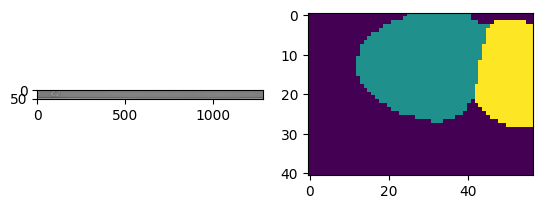

##################
Had 2 objects, saved 2:
(74, 11, 108, 39) 0
(104, 13, 119, 40) 0
##################
Frame 21918: NEW batch detected → saved 3 fully entered objects
Frame 21919: Object not fully entered (too_close_to_left_edge)
Frame 21919: Object not fully entered (too_close_to_left_edge)
Frame 21919: Clear frame detected → ready for new objects
Frame 21920: Object not fully entered (too_close_to_left_edge)
Frame 21920: No fully entered objects
Frame 21921: No fully entered objects
Frame 21922: No fully entered objects
Frame 21923: No fully entered objects
Frame 21924: No fully entered objects
Frame 21925: No fully entered objects
Frame 21926: No fully entered objects
Frame 21927: No fully entered objects
Frame 21928: No fully entered objects
Frame 21929: No fully entered objects
Frame 21930: No fully entered objects
Frame 21931: No fully entered objects
Frame 21932: No fully entered objects
Frame 21933: No fully entered objects
Frame 21934: No fully entered objects
Frame 21935: No 

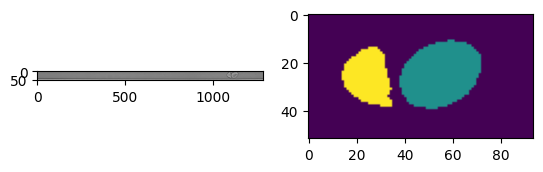

##################
Had 2 objects, saved 2:
(1102, 11, 1136, 40) 0
(1078, 14, 1099, 39) 0
##################
Frame 23340: NEW batch detected → saved 2 fully entered objects
Frame 23341: Fully entered objects still present (waiting for clear frame)
Frame 23342: Fully entered objects still present (waiting for clear frame)
Frame 23343: Fully entered objects still present (waiting for clear frame)
Frame 23344: Fully entered objects still present (waiting for clear frame)
Frame 23345: Fully entered objects still present (waiting for clear frame)
Frame 23346: Fully entered objects still present (waiting for clear frame)
Frame 23347: Fully entered objects still present (waiting for clear frame)
Frame 23348: Fully entered objects still present (waiting for clear frame)
Frame 23349: Fully entered objects still present (waiting for clear frame)
Frame 23350: Fully entered objects still present (waiting for clear frame)
Frame 23351: Fully entered objects still present (waiting for clear frame)
Fra

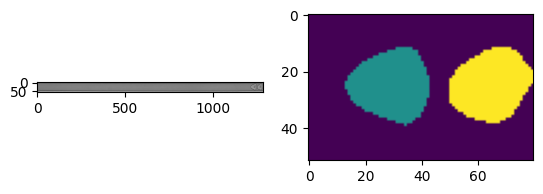

##################
Had 2 objects, saved 2:
(1213, 12, 1243, 40) 0
(1250, 12, 1280, 39) 0
##################
Frame 24112: NEW batch detected → saved 2 fully entered objects
Frame 24113: Object not fully entered (too_close_to_right_edge)
Frame 24113: Clear frame detected → ready for new objects
Frame 24114: Object not fully entered (too_close_to_right_edge)
Frame 24114: No fully entered objects
Frame 24115: Object not fully entered (too_close_to_right_edge)


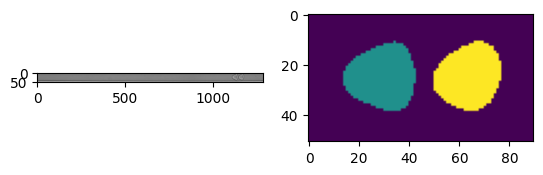

##################
Had 2 objects, saved 2:
(1108, 12, 1137, 40) 0
(1144, 12, 1171, 40) 0
##################
Frame 24115: NEW batch detected → saved 2 fully entered objects
Frame 24116: Fully entered objects still present (waiting for clear frame)
Frame 24117: Fully entered objects still present (waiting for clear frame)
Frame 24118: Fully entered objects still present (waiting for clear frame)
Frame 24119: Fully entered objects still present (waiting for clear frame)
Frame 24120: Fully entered objects still present (waiting for clear frame)
Frame 24121: Fully entered objects still present (waiting for clear frame)
Frame 24122: Fully entered objects still present (waiting for clear frame)
Frame 24123: Fully entered objects still present (waiting for clear frame)
Frame 24124: Object not fully entered (too_close_to_right_edge)
Frame 24124: Fully entered objects still present (waiting for clear frame)
Frame 24125: Object not fully entered (too_close_to_right_edge)
Frame 24125: Fully entere

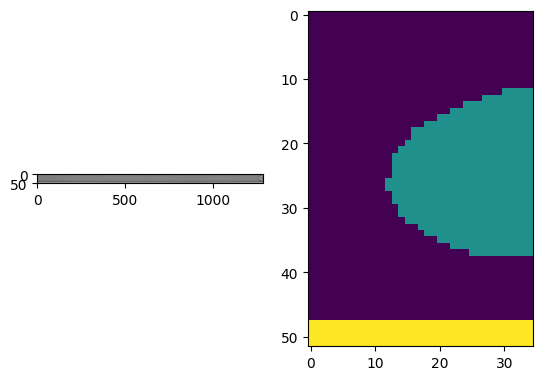

##################
Had 2 objects, saved 2:
(1257, 12, 1280, 38) 0
(1245, 48, 1280, 52) 0
##################
Frame 24406: NEW batch detected → saved 2 fully entered objects
Frame 24407: Object not fully entered (too_close_to_right_edge)
Frame 24407: Clear frame detected → ready for new objects
Frame 24408: Object not fully entered (too_close_to_right_edge)
Frame 24408: No fully entered objects
Frame 24409: Object not fully entered (too_close_to_right_edge)
Frame 24409: No fully entered objects
Frame 24410: NEW batch detected → saved 1 fully entered objects
Frame 24411: Fully entered objects still present (waiting for clear frame)
Frame 24412: Fully entered objects still present (waiting for clear frame)
Frame 24413: Fully entered objects still present (waiting for clear frame)
Frame 24414: Fully entered objects still present (waiting for clear frame)
Frame 24415: Fully entered objects still present (waiting for clear frame)
Frame 24416: Fully entered objects still present (waiting for c

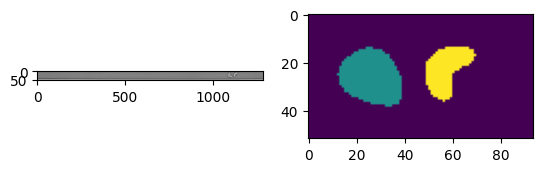

##################
Had 2 objects, saved 2:
(1078, 14, 1105, 39) 0
(1115, 14, 1136, 37) 0
##################
Frame 26555: NEW batch detected → saved 2 fully entered objects
Frame 26556: Fully entered objects still present (waiting for clear frame)
Frame 26557: Fully entered objects still present (waiting for clear frame)
Frame 26558: Fully entered objects still present (waiting for clear frame)
Frame 26559: Fully entered objects still present (waiting for clear frame)
Frame 26560: Fully entered objects still present (waiting for clear frame)
Frame 26561: Fully entered objects still present (waiting for clear frame)
Frame 26562: Fully entered objects still present (waiting for clear frame)
Frame 26563: Fully entered objects still present (waiting for clear frame)
Frame 26564: Fully entered objects still present (waiting for clear frame)
Frame 26565: Fully entered objects still present (waiting for clear frame)
Frame 26566: Fully entered objects still present (waiting for clear frame)
Fra

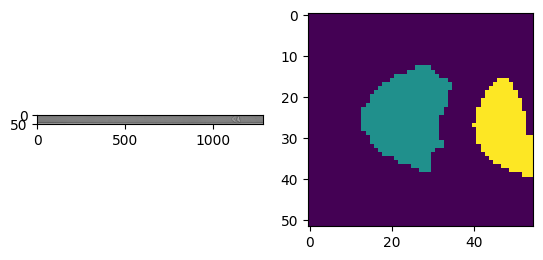

##################
Had 2 objects, saved 2:
(1106, 13, 1128, 39) 0
(1133, 16, 1148, 40) 0
##################
Frame 27581: NEW batch detected → saved 3 fully entered objects
Frame 27582: Fully entered objects still present (waiting for clear frame)
Frame 27583: Fully entered objects still present (waiting for clear frame)
Frame 27584: Fully entered objects still present (waiting for clear frame)
Frame 27585: Fully entered objects still present (waiting for clear frame)
Frame 27586: Fully entered objects still present (waiting for clear frame)
Frame 27587: Fully entered objects still present (waiting for clear frame)
Frame 27588: Fully entered objects still present (waiting for clear frame)
Frame 27589: Fully entered objects still present (waiting for clear frame)
Frame 27590: Fully entered objects still present (waiting for clear frame)
Frame 27591: Fully entered objects still present (waiting for clear frame)
Frame 27592: Fully entered objects still present (waiting for clear frame)
Fra

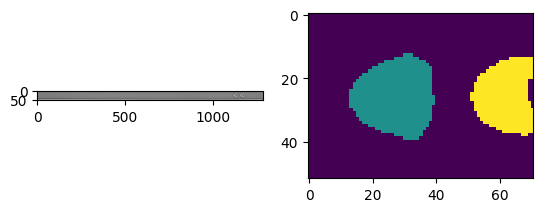

##################
Had 2 objects, saved 2:
(1111, 13, 1138, 40) 0
(1149, 14, 1169, 39) 0
##################
Frame 28338: NEW batch detected → saved 3 fully entered objects
Frame 28339: Fully entered objects still present (waiting for clear frame)
Frame 28340: Fully entered objects still present (waiting for clear frame)
Frame 28341: Fully entered objects still present (waiting for clear frame)
Frame 28342: Fully entered objects still present (waiting for clear frame)
Frame 28343: Fully entered objects still present (waiting for clear frame)
Frame 28344: Fully entered objects still present (waiting for clear frame)
Frame 28345: Fully entered objects still present (waiting for clear frame)
Frame 28346: Fully entered objects still present (waiting for clear frame)
Frame 28347: Fully entered objects still present (waiting for clear frame)
Frame 28348: Object not fully entered (too_close_to_right_edge)
Frame 28348: Fully entered objects still present (waiting for clear frame)
Frame 28349: O

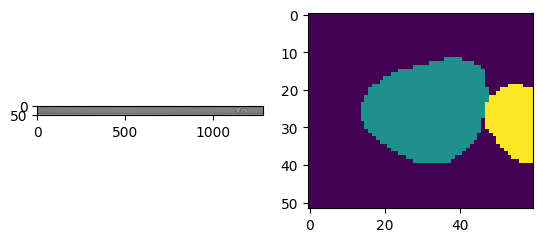

##################
Had 2 objects, saved 2:
(1129, 12, 1163, 40) 0
(1162, 19, 1175, 40) 0
##################
Frame 29671: NEW batch detected → saved 3 fully entered objects
Frame 29672: Fully entered objects still present (waiting for clear frame)
Frame 29673: Fully entered objects still present (waiting for clear frame)
Frame 29674: Fully entered objects still present (waiting for clear frame)
Frame 29675: Fully entered objects still present (waiting for clear frame)
Frame 29676: Fully entered objects still present (waiting for clear frame)
Frame 29677: Fully entered objects still present (waiting for clear frame)
Frame 29678: Fully entered objects still present (waiting for clear frame)
Frame 29679: Fully entered objects still present (waiting for clear frame)
Frame 29680: Fully entered objects still present (waiting for clear frame)
Frame 29681: Fully entered objects still present (waiting for clear frame)
Frame 29682: Fully entered objects still present (waiting for clear frame)
Fra

NameError: name 'OUTPUT_DIR_tmp' is not defined

In [56]:
# ─────────────────────────────────────────────────────────────────────────────────
# PARAMETERS
# Detection parameters
DIFF_THRESH = 30                       # Per-pixel difference threshold (0-255)
MIN_CONTOUR_AREA = 100                 # Minimum area for detected objects
MAX_CONTOUR_AREA = 50000               # Maximum area for detected objects
MARGIN_X = 10                          # Extra pixels to pad left/right when cropping
MARGIN_Y = 10                          # Extra pixels to pad top/bottom when cropping

# Morphological operations parameters
MORPH_KERNEL_SIZE = 5                  # Size of morphological kernel
CLOSE_ITERATIONS = 2                   # Iterations for morphological closing
OPEN_ITERATIONS = 1                    # Iterations for morphological opening

# Processing parameters
SKIP_FRAMES = 1                        # Process every N frames (1 = process all)
MAX_OBJECTS = None                     # Maximum number of objects to detect
EDGE_BUFFER_COLS = 100                  # Minimum columns of background needed at left/right edges
# ─────────────────────────────────────────────────────────────────────────────────


def preprocess_mask(mask, kernel_size=5, close_iter=2, open_iter=1):
    """Apply morphological operations to clean up the binary mask"""
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=close_iter) # Close small gaps
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=open_iter)   # Remove small noise
    return mask

def check_object_fully_entered(gray_frame, gray_bg, bbox, edge_buffer_cols, diff_thresh):
    """Check if object is fully entered by verifying edge columns are background-like"""
    x0, y0, x1, y1 = bbox
    h, w = gray_frame.shape[:2]
    
    # Check left edge buffer
    left_buffer_start = max(0, x0 - edge_buffer_cols)
    left_buffer_end = x0
    if left_buffer_end > left_buffer_start:
        left_region_frame = gray_frame[y0:y1, left_buffer_start:left_buffer_end]
        left_region_bg = gray_bg[y0:y1, left_buffer_start:left_buffer_end]
        left_diff = cv2.absdiff(left_region_frame, left_region_bg)
        left_mean_diff = np.mean(left_diff)
        if left_mean_diff > diff_thresh * 0.5:  # Half threshold for edge checking
            return False, "left_edge_not_clear"
    
    # Check right edge buffer  
    right_buffer_start = x1
    right_buffer_end = min(w, x1 + edge_buffer_cols)
    if right_buffer_end > right_buffer_start:
        right_region_frame = gray_frame[y0:y1, right_buffer_start:right_buffer_end]
        right_region_bg = gray_bg[y0:y1, right_buffer_start:right_buffer_end]
        right_diff = cv2.absdiff(right_region_frame, right_region_bg)
        right_mean_diff = np.mean(right_diff)
        if right_mean_diff > diff_thresh * 0.5:  # Half threshold for edge checking
            return False, "right_edge_not_clear"
    
    # Check if object is too close to frame edges
    if x0 < edge_buffer_cols:
        return False, "too_close_to_left_edge"
    if x1 > (w - edge_buffer_cols):
        return False, "too_close_to_right_edge"
    
    return True, "fully_entered"
def detect_and_crop_objects(gray_frame, gray_bg, frame_idx,
                           diff_thresh=30, min_area=100, max_area=50000,
                           margin_x=10, margin_y=10, save_objects=True):
    """Detect objects by comparing frame to background and optionally crop them"""
    
    h, w = gray_frame.shape[:2]
    
    # Compute absolute difference
    diff = cv2.absdiff(gray_frame, gray_bg)
    
    # Apply threshold to create binary mask
    _, mask = cv2.threshold(diff, diff_thresh, 255, cv2.THRESH_BINARY)
    
    # Clean up the mask with morphological operations
    mask = preprocess_mask(mask, MORPH_KERNEL_SIZE, CLOSE_ITERATIONS, OPEN_ITERATIONS)
    
    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    detected_objects = []
    valid_contours = []
    
    # Filter contours by area and extract bounding boxes
    for contour in contours:
        area = cv2.contourArea(contour)
        if min_area <= area <= max_area:
            valid_contours.append(contour)
    
    # Sort contours by area (largest first)
    valid_contours.sort(key=cv2.contourArea, reverse=True)
    
    for i, contour in enumerate(valid_contours):
        # Get bounding rectangle
        x, y, box_w, box_h = cv2.boundingRect(contour)
        
        # Add margins
        x0_crop = max(0, x - margin_x)
        y0_crop = max(0, y - margin_y)
        x1_crop = min(w, x + box_w + 2*margin_x)
        y1_crop = min(h, y + box_h + margin_y)
        
        # Store object info
        detected_objects.append({
            'bbox': (x0_crop, y0_crop, x1_crop, y1_crop),
            'area': cv2.contourArea(contour)
        })
        
        # Only save if requested (controlled by the main loop logic)
        if save_objects:
            cropped = frame[y0_crop:y1_crop, x0_crop:x1_crop]
            if cropped.size > 0:  # Make sure crop is valid                
                detected_objects[-1]['filename'] = filename
    
    return detected_objects, mask

def convert_img_bbox_to_yolo_bbox(image_shape, bbox):
    """
    Parameters
    ----------
    image_shape: shape of 2D np array
    bbox: x_min, y_min, x_max, y_max

    Returns
    --------
    x_center, y_center, width, height in 0-1 scale.
    """
    image_height, image_width = image_shape

    x_min, y_min, x_max, y_max = bbox
    
    x_center = (x_min + x_max) / 2 # Calculate bounding box center
    y_center = (y_min + y_max) / 2
    width    = (x_max - x_min)     # Width and height of bbox
    height   = (y_max - y_min)
    x_center /= image_width        # convert to YOLO's 0-1 scale
    y_center /= image_height
    width    /= image_width
    height   /= image_height
    return x_center, y_center, width, height

def filter_objects(frame, detected_objects):
    """
    Assign label to detected objects based on the 
    cell type it should be.
    Returns
    -------
    list: list of (obj_info['bbox'], label)
    """
    # Only keep images whose proportion of non-zeros pixels is less than : 
    THRESHOLD_PERCENT = 70
    # And only keep images which has nb of nonzero_pixels smaller than:
    ABS_NB_NZ_PIXELS = 450 # prevent cell aggregate
    # And only keep images that have a ratio difference r1 - r2 ...
    # r1 = nb_NZ_pixels_top / nb_NZ_pixels
    # r2 = nb_NZ_pixels_bottom / nb_NZ_pixels
    # ... greater than: 
    THRESHOLD_RATIO = .1 # to keep images with well defined slipper tail
    
    labelled_objects = [] # list of (bbox, label)
    
    for obj_info in detected_objects:
        
        x0, y0, x1, y1 = obj_info['bbox']
        
        # STEP 1: extract the objects from the background
        cropped_object = frame[y0:y1, x0:x1]
        if cropped_object.size == 0: continue
        mask = cellpose.SegmentImages([cropped_object], diameter=40)[0]
        if len(np.unique(mask)) > 2:
            plt.figure()
            plt.subplot(121)
            plt.imshow(frame, cmap='gray', vmin=0, vmax=255)
            plt.subplot(122)
            plt.imshow(mask)
            plt.show()
            plt.close()
        obj_detected = 0
        for mask_value in np.unique(mask):
            if mask_value == 0: continue # background
                
            # === Get the mask for this specific cell ===
            # ===        (ie the sub-bbox)            ===
            cell_mask = (mask == mask_value)
            
            # Find bounding box of this mask in the cropped coordinates
            rows, cols = np.where(cell_mask)
            if len(rows) == 0 or len(cols) == 0:
                continue
            min_row, max_row = rows.min(), rows.max()
            min_col, max_col = cols.min(), cols.max()
            sub_x0 = x0 + min_col      # Convert back to original frame coordinates
            sub_y0 = y0 + min_row
            sub_x1 = x0 + max_col + 1  # +1 because slicing is exclusive
            sub_y1 = y0 + max_row + 1
            sub_bbox = (sub_x0, sub_y0, sub_x1, sub_y1)

            # === Extract the cell using the mask ===
            extracted = Image.fromarray(cropped_object * np.array(mask == mask_value))
            imageBox = extracted.getbbox()
            img = np.array(extracted.crop(imageBox)) # cropped image to cell content
            
        
            # STEP 2: filter
            if CELL_TYPE == 'slipper':
                # Count non zero pixels in left/right/top/bottom quarters
                nonzero_pixels = np.count_nonzero(img)                        # Count non-zero pixels
                total_pixels = img.shape[0] * img.shape[1]                    # To Calculate percentage below
                nonzero_percent = (nonzero_pixels / total_pixels) * 100
                nonzero_top = np.count_nonzero(img[:img.shape[0]//2 + 1])     # Include middle row in top half
                nonzero_bottom = np.count_nonzero( img[img.shape[0]//2 + 1:])
                nonzero_left =  np.count_nonzero(img[:,:img.shape[1]//2 + 1]) # Include middle row in top half
                nonzero_right =  np.count_nonzero(img[:,img.shape[1]//2 + 1:])
        
                ratio_top = nonzero_top / nonzero_pixels
                ratio_bot = nonzero_bottom / nonzero_pixels
                ratio_left = nonzero_left / nonzero_pixels
                ratio_right = nonzero_right / nonzero_pixels
                good_LR_ratio = False
                if ORIENTATION == 'L':
                    good_LR_ratio = ratio_left > ratio_right
                else:
                    good_LR_ratio = ratio_left < ratio_right
                
                # Check if image meets threshold
                if nonzero_percent < THRESHOLD_PERCENT and nonzero_pixels < ABS_NB_NZ_PIXELS and \
                    abs(ratio_top - ratio_bot) > THRESHOLD_RATIO and good_LR_ratio:
                    # is a slipper!
                    label = '1'
                else:
                    label= '2' # other
            elif CELL_TYPE == 'croissant':
                label='0' # croissant by default
            else: 
                raise ValueError(f'Unknown `CELL_TYPE`={CELL_TYPE}')
            obj_detected += 1
            labelled_objects.append((sub_bbox, label))
            
        if len(np.unique(mask)) > 2:
            print('##################')
            print(f'Had {len(np.unique(mask))-1} objects, saved {obj_detected}:')
            for lo in labelled_objects[-obj_detected:]:
                print(lo[0], lo[1])
            print('##################')
            
            
    return labelled_objects
            
    
def main():    
    # Open video
    cap = cv2.VideoCapture(VIDEO_PATH)
    if not cap.isOpened():
        raise RuntimeError(f"Could not open {VIDEO_PATH!r}")
    
    nb_total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Video has {nb_total_frames} frames")
    
    # Read background frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, BACKGROUND_FRAME_IDX)
    ret, background_frame_bgra = cap.read()
    if not ret:
        raise RuntimeError(f"Failed to read background frame {BACKGROUND_FRAME_IDX}")

    background_frame = cv2.cvtColor(background_frame_bgra, cv2.COLOR_BGRA2GRAY)
    
    # Save background reference
    #bg_ref_path = os.path.join(OUTPUT_DIR_tmp, f"background_reference_frame_{BACKGROUND_FRAME_IDX:05d}.png")
    #cv2.imwrite(bg_ref_path, background_frame)
    #print(f"Background reference saved: {bg_ref_path}")
    
    # Process all frames with state tracking
    batch_count = 0
    frame_idx = 0
    waiting_for_clear_frame = False  # State: True = wait for no objects, False = can save objects
    
    print(f"Processing frames with parameters:")
    print(f"  Difference threshold: {DIFF_THRESH}")
    print(f"  Min contour area: {MIN_CONTOUR_AREA}")
    print(f"  Max contour area: {MAX_CONTOUR_AREA}")
    print(f"  Skip frames: {SKIP_FRAMES}")
    print(f"  Edge buffer columns: {EDGE_BUFFER_COLS}")
    print(f"  Logic: Save only fully entered objects, then wait for clear frame")
    print()
    
    while frame_idx < nb_total_frames and (MAX_OBJECTS is not None and batch_count < MAX_OBJECTS or MAX_OBJECTS is None):
        # Read frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame_bgra = cap.read()
        if not ret:
            break
        
        # Skip frames if specified
        if frame_idx % SKIP_FRAMES != 0:
            frame_idx += 1
            continue


        frame = cv2.cvtColor(frame_bgra, cv2.COLOR_BGRA2GRAY)
        
        
        # ====== 1. FIND CELLS =======
        detected_objects, debug_mask = detect_and_crop_objects(
            frame, background_frame, frame_idx,
            DIFF_THRESH, MIN_CONTOUR_AREA, MAX_CONTOUR_AREA,
            MARGIN_X, MARGIN_Y, save_objects=False  # Don't save yet, we'll control this
        )

        # Filter objects to only include those fully entered
        fully_entered_objects = []
        for obj_info in detected_objects:
            is_fully_entered, reason = check_object_fully_entered(
                frame, background_frame, obj_info['bbox'], EDGE_BUFFER_COLS, DIFF_THRESH
            )
            if is_fully_entered:
                fully_entered_objects.append(obj_info)
            else:
                # Debug info for partially entered objects
                print(f"Frame {frame_idx:5d}: Object not fully entered ({reason})")
        
        objects_found = len(fully_entered_objects) > 0
        
        if objects_found and not waiting_for_clear_frame:
            
            objects_n_labels = filter_objects(frame, detected_objects) # give each object its label
        
            image_n_label_filename_base = f'{VIDEO_NAME}_frame_{frame_idx:06d}'
            # New objects detected and we're allowed to save → save them
            saved_objects = 0
            saved_bbox = [] # list of bbox coordinates as str ie. as written in file
            for i, (obj_bbox, label) in enumerate(objects_n_labels):
                # Re-crop and save the object
                x0, y0, x1, y1 = obj_bbox
                bbox_yolo = convert_img_bbox_to_yolo_bbox(frame.shape, obj_bbox)
                
                if f"{bbox_yolo[0]:.6f} {bbox_yolo[1]:.6f} {bbox_yolo[2]:.6f} {bbox_yolo[3]:.6f}" in saved_bbox:
                    continue
                with open(os.path.join(OUTPUT_DIR_labels, image_n_label_filename_base + '.txt'), "a") as label_file:
                    label_file.write(f"{label} {bbox_yolo[0]:.6f} {bbox_yolo[1]:.6f} {bbox_yolo[2]:.6f} {bbox_yolo[3]:.6f}\n")
                    saved_bbox.append(f"{bbox_yolo[0]:.6f} {bbox_yolo[1]:.6f} {bbox_yolo[2]:.6f} {bbox_yolo[3]:.6f}")
                    
                saved_objects += 1

            if saved_objects > 0:
                Image.fromarray(frame).save(os.path.join(OUTPUT_DIR_img, image_n_label_filename_base + '.png'))
                
                batch_count += 1
                print(f"Frame {frame_idx:5d}: NEW batch detected → saved {saved_objects} fully entered objects")
                
                # Now wait for clear frame before allowing new saves
                waiting_for_clear_frame = True
            
        elif objects_found and waiting_for_clear_frame:
            # Objects still present, but we're waiting for them to disappear
            print(f"Frame {frame_idx:5d}: Fully entered objects still present (waiting for clear frame)")
            
        elif not objects_found and waiting_for_clear_frame:
            # No fully entered objects detected and we were waiting → reset to allow new detections
            print(f"Frame {frame_idx:5d}: Clear frame detected → ready for new objects")
            waiting_for_clear_frame = False
            
        elif not objects_found and not waiting_for_clear_frame:
            # No fully entered objects and we're already ready → just continue
            print(f"Frame {frame_idx:5d}: No fully entered objects")

        
        frame_idx += SKIP_FRAMES
        
        # Progress indicator
        if frame_idx % 100 == 0:
            print(f"Progress: {frame_idx}/{nb_total_frames} frames processed, {batch_count} batches saved")
    
    cap.release()
    
    print(f"\nProcessing complete!")
    print(f"Total object batches detected and cropped: {batch_count}")
    print(f"Output directory: {OUTPUT_DIR_img} and {OUTPUT_DIR_labels}")
    print(f"Background frame used: {BACKGROUND_FRAME_IDX}")
    print(f"Final state: {'Waiting for clear frame' if waiting_for_clear_frame else 'Ready for new objects'}")

if __name__ == "__main__":
    main()

# Part 1: extract cells

|Goal|Create a dataset of extracted cells, with associated labels (croissants, slippers, other)|
|--|--|
|Method|Take a reference frame (empty), for all frames, each part of the frame that is different must be a cell|
|Slipper type inference|Slippers have a tail (#pixels at left > #pixels at right). All other cells are others|
|Croissant type inference|All cells are croissants by default|


In [69]:
import cv2
import numpy as np
import os
from tqdm import tqdm

from omegaconf import DictConfig, OmegaConf
from hydra import initialize, compose

with initialize(config_path="../conf", version_base="1.3"):
    cfg = compose(config_name="config")
    print(OmegaConf.to_yaml(cfg))

import sys, importlib
sys.path.append('../')
from scripts import metadata
importlib.reload(metadata)
from scripts import metadata as mda

# ─────────────────────────────────────────────────────────────────────────────────
# PARAMETERS

DONOR_NAME = "blood_donor_1"
VIDEO_NAME = "1000_mbar_400_fps_20200214_105325.avi"
BACKGROUND_FRAME_IDX = 21 
#VIDEO_NAME = "0100_mbar_100_fps.avi"
#BACKGROUND_FRAME_IDX = 44

"""
DONOR_NAME = "blood_donor_2"
#VIDEO_NAME = "1000_mbar_400_fps_20200530_140558.avi"
#BACKGROUND_FRAME_IDX = 3
VIDEO_NAME = "0100_mbar_050_fps_20200530_155822.avi"
BACKGROUND_FRAME_IDX = 1

DONOR_NAME = "blood_donor_3"
#VIDEO_NAME = "1000_mbar_400_fps_20200527_122902.avi"
#BACKGROUND_FRAME_IDX = 18
VIDEO_NAME = "0100_mbar_100_fps_20200527_140344.avi"
BACKGROUND_FRAME_IDX = 56
"""

# ==================================================
# 🔥🔥🔥 CHANGE THIS BASED ON THE VIDEO TYPE 🔥🔥🔥
CELL_TYPE = 'slipper'

ORIENTATION = 'L' # L for left: cells are going TO the left
# Slippers orientation : L = going to the left.
# Only keep images that has more pixels on the left than on the 
# right (if 'L', opposite if 'R').
# ==================================================

VIDEO_PATH       = os.path.join(
    cfg.paths.root_abs, cfg.paths.nouaman_videos_from_root, 
    DONOR_NAME, VIDEO_NAME
)
OUTPUT_DIR_tmp       = os.path.join(cfg.paths.root_abs, cfg.paths.nouaman_videos_from_root, DONOR_NAME, "cropped_" + CELL_TYPE + "_tmp")
OUTPUT_DIR_extracted       = os.path.join(cfg.paths.root_abs, cfg.paths.nouaman_videos_from_root, DONOR_NAME, "cropped_" + CELL_TYPE + "_extracted")
OUTPUT_DIR_filtered      = os.path.join(cfg.paths.root_abs, cfg.paths.nouaman_videos_from_root, DONOR_NAME, "cropped_" + CELL_TYPE + "_filtered")
# ─────────────────────────────────────────────────────────────────────────────────

paths:
  root_abs: /home/alex/dev/python/tx_rbc/tx_shared/
  data_from_notebooks: ../data/
  labelstudio_root_to_remove: ../..
  dataset_with_realcells_from_root: data/copy_paste_from_real
  liang_2024_from_root: data/2024_liang
  kihm_2018_from_root: data/2018_plos
  nouaman_from_root: data/2024_nouaman
  nouaman_annotations_from_root: data/saarland/annotations/result.json
  nouaman_videos_from_root: data/videos/nouaman_2024
splits:
  liang_2024_split_test: 48
  liang_2024_split_train: 48
  liang_2024_split_val: 4
  kihm_2018_split_test: 28
  kihm_2018_split_train: 68
  kihm_2018_split_val: 4
  nouaman_2024_split_test: 48
  nouaman_2024_split_train: 48
  nouaman_2024_split_val: 4
dataset_distribution:
  train_liang: 10
  train_nouaman: 80
  train_kihm: 70
  test_liang: 90
  test_nouaman: 10
  test_kihm: 15
  val_liang: 0
  val_nouaman: 10
  val_kihm: 15
factors:
  noise_fn:
  - none
  - gaussian
  - salt_pepper
  - random
  croissant_count:
  - 3
  - 4
  slipper_count:
  - 3
  - 4
  o

## Extract cells from frame

### ❌ ~~Method 1: watch only the right part of the video~~

To detect if cells are present as coming from the right.

🛑 ISSUE: cells move to fast! So only a few are pictured here. So method 2 => watch not only the right part, but the full frame.

In [73]:
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 1) Open the video and grab frame0 to build the reference strip
cap = cv2.VideoCapture(VIDEO_PATH)
if not cap.isOpened():
    raise RuntimeError(f"Could not open {VIDEO_PATH!r}")

nb_total_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Video has {nb_total_frame} frames")
ret, frame0 = cap.read()
if not ret:
    raise RuntimeError("Failed to read the first frame.")

h, w = frame0.shape[:2]
x0 = w - STRIP_WIDTH
background_strip = frame0[:, x0 : w].copy()
fname = os.path.join(OUTPUT_DIR, f"background_reference.png") # Save reference background
cv2.imwrite(fname, background_strip)

# 2) Loop through frames and detect “entering / fully entered”
cell_count = 0
in_entry    = False  # True once we detect strip≠background but not yet returned to background

frame_idx = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_idx += 1

    # Extract the same vertical strip for the current frame
    current_strip = frame[:, x0 : w]

    # 2a) Compute absolute‐difference mask
    diff = cv2.absdiff(current_strip, background_strip) # the difference image
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)       # convert this diff-img to grayscale
    _, bw  = cv2.threshold(gray, DIFF_THRESH, 255, cv2.THRESH_BINARY)
    nonzero = cv2.countNonZero(bw)

    strip_changed = (nonzero > PIXEL_COUNT_MIN)

    if strip_changed and not in_entry:
        # A cell has just started entering from the right edge
        in_entry = True
        # print(f"Frame {frame_idx}: cell ENTERING")
    elif in_entry and not strip_changed:
        # The strip returned to background → the cell is now fully inside
        # Save this frame (or locate & crop the cell)
        # print(f"Frame {frame_idx}: cell FULLY ENTERED → cropping")
        in_entry = False

        # ▶▶▶ Now we find & crop the cell in “frame” ◀◀◀
        #    We'll do a quick background‐subtraction on the entire frame
        gray_full = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray_bg   = cv2.cvtColor(frame0, cv2.COLOR_BGR2GRAY)
        absdiff   = cv2.absdiff(gray_full, gray_bg)
        _, fgmask = cv2.threshold(absdiff, DIFF_THRESH, 255, cv2.THRESH_BINARY)

        # Optional: morphological cleanup
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
        fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_CLOSE, kernel, iterations=2)
        fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN,  kernel, iterations=1)

        # Find contours; assume the cell is the largest blob that’s near the right side
        contours, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            # Pick the contour with the largest area
            c = max(contours, key=cv2.contourArea)
            x,y,ww,hh = cv2.boundingRect(c)

            # Add a small margin
            x0_crop = max(0, x - MARGIN_X)
            y0_crop = max(0, y - MARGIN_Y)
            x1_crop = min(w, x + ww + MARGIN_X)
            y1_crop = min(h, y + hh + MARGIN_Y)

            cropped = frame[y0_crop:y1_crop, x0_crop:x1_crop]

            # Save the crop
            cell_count += 1
            fname = os.path.join(OUTPUT_DIR, f"cell_{cell_count:03d}_frame_{frame_idx:05d}.png")
            cv2.imwrite(fname, cropped)
            print(f"Saved {fname} (frame {frame_idx}, bbox=({x0_crop},{y0_crop})–({x1_crop},{y1_crop}))")
            if cell_count > 50:
                break
        else:
            print(f"WARNING: No contours found at frame {frame_idx}.")

# Cleanup
cap.release()
print(f"Done. {cell_count} cells cropped into “{OUTPUT_DIR}/”.")

Video has 32225 frames
Saved /home/alex/dev/python/tx_rbc/tx_shared/data/videos/nouaman_2024/blood_donor_1/cropped_cells/cell_001_frame_02030.png (frame 2030, bbox=(1133,3)–(1182,36))
Saved /home/alex/dev/python/tx_rbc/tx_shared/data/videos/nouaman_2024/blood_donor_1/cropped_cells/cell_002_frame_02171.png (frame 2171, bbox=(1127,4)–(1189,45))
Saved /home/alex/dev/python/tx_rbc/tx_shared/data/videos/nouaman_2024/blood_donor_1/cropped_cells/cell_003_frame_02534.png (frame 2534, bbox=(1125,6)–(1183,46))
Saved /home/alex/dev/python/tx_rbc/tx_shared/data/videos/nouaman_2024/blood_donor_1/cropped_cells/cell_004_frame_04151.png (frame 4151, bbox=(1133,16)–(1180,49))
Saved /home/alex/dev/python/tx_rbc/tx_shared/data/videos/nouaman_2024/blood_donor_1/cropped_cells/cell_005_frame_07596.png (frame 7596, bbox=(1141,2)–(1187,36))
Saved /home/alex/dev/python/tx_rbc/tx_shared/data/videos/nouaman_2024/blood_donor_1/cropped_cells/cell_006_frame_11024.png (frame 11024, bbox=(1135,15)–(1181,48))
Saved /h

### ✅ Method 2: watch all frame

#### Step 1: found proper frame to consider as background

First frame of videos has cells, we want a frame with no cells. So the following plots frames one by one for us to take the one with no cell as reference background frame.

Video has 32225 frames
Controls:
  ENTER - Next frame
  'b' + ENTER - Go back one frame
  'j' + ENTER - Jump to specific frame
  's' + ENTER - Save current frame as background reference
  'q' + ENTER - Quit



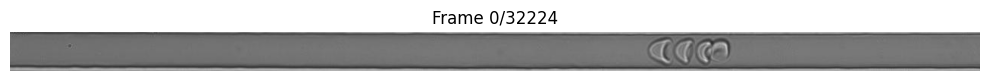

Frame 0/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


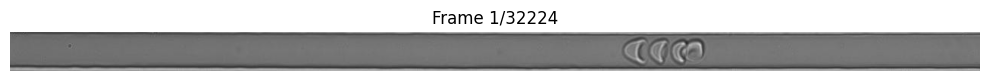

Frame 1/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


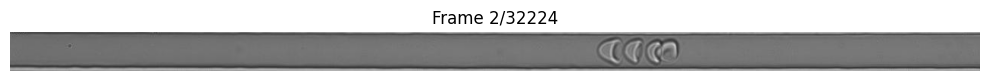

Frame 2/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


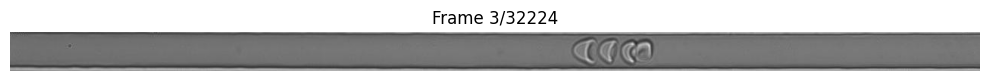

Frame 3/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


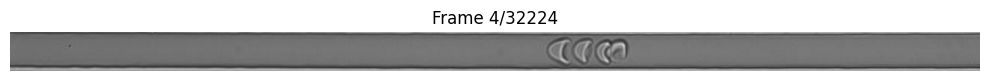

Frame 4/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


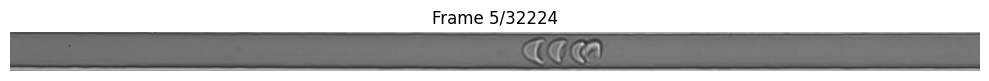

Frame 5/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


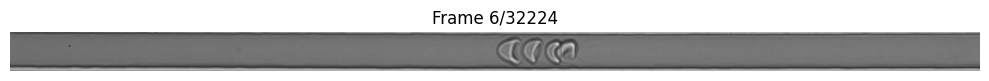

Frame 6/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


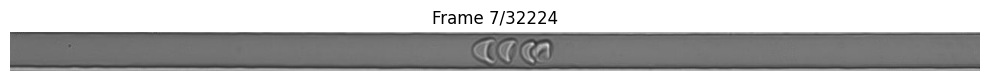

Frame 7/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


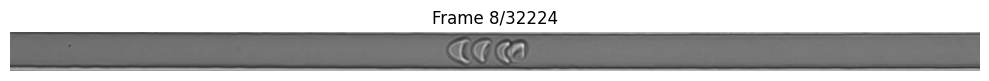

Frame 8/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


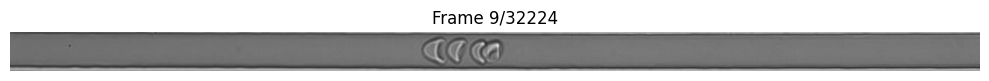

Frame 9/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


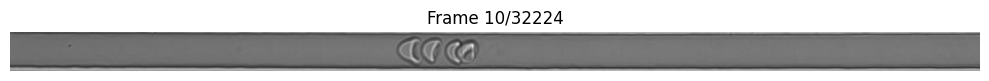

Frame 10/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


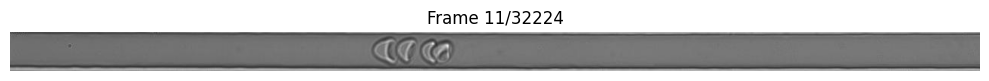

Frame 11/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


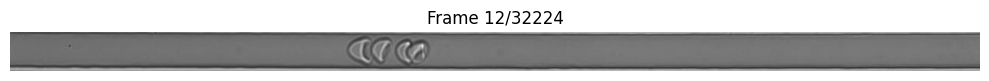

Frame 12/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


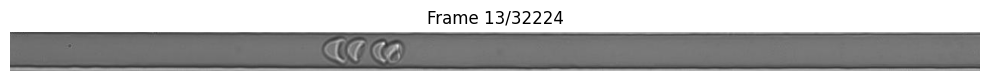

Frame 13/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


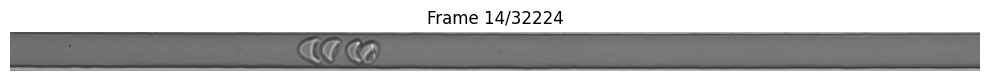

Frame 14/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


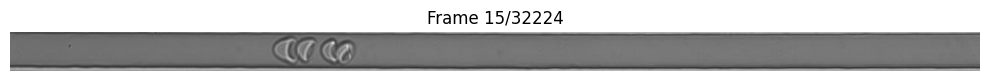

Frame 15/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


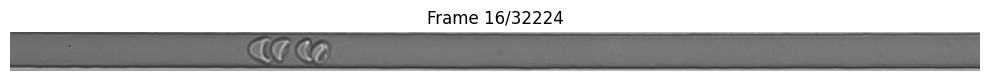

Frame 16/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


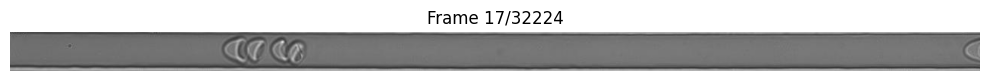

Frame 17/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


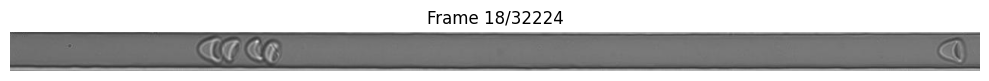

Frame 18/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


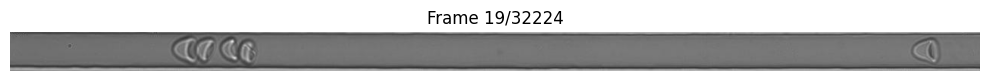

Frame 19/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


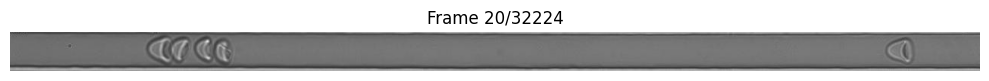

Frame 20/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


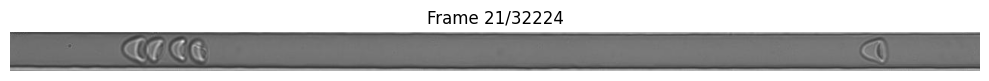

Frame 21/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


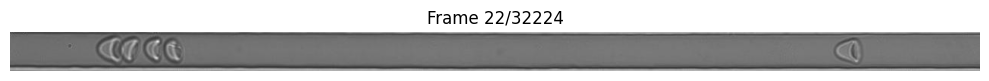

Frame 22/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


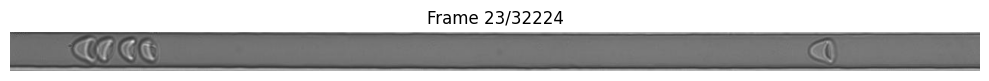

Frame 23/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


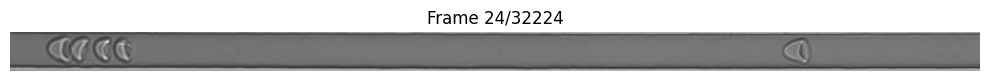

Frame 24/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


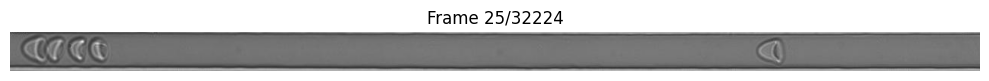

Frame 25/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


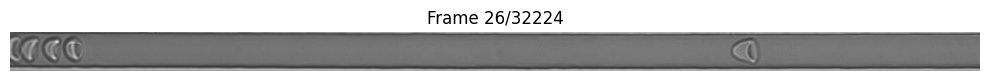

Frame 26/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


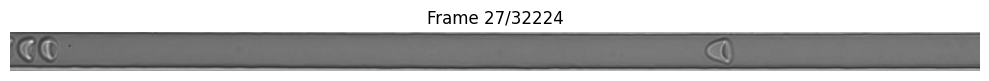

Frame 27/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


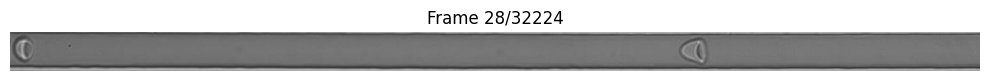

Frame 28/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


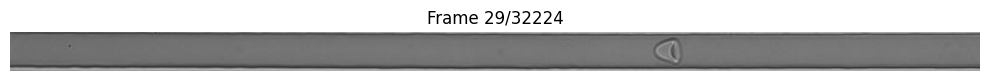

Frame 29/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


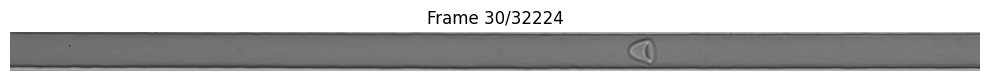

Frame 30/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


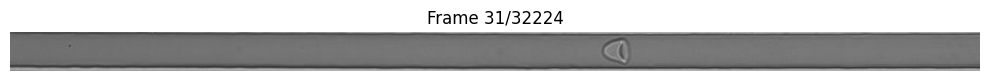

Frame 31/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


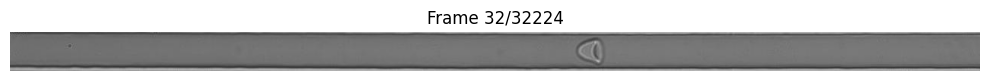

Frame 32/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


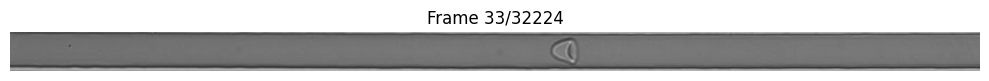

Frame 33/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


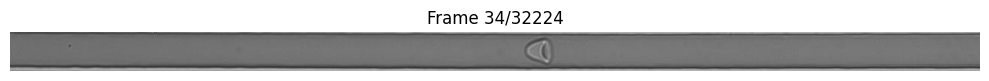

Frame 34/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


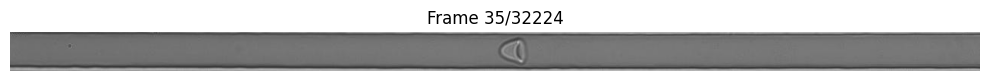

Frame 35/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


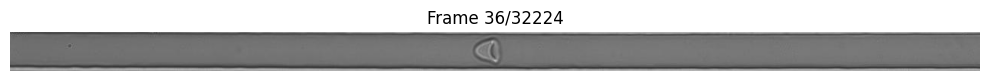

Frame 36/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


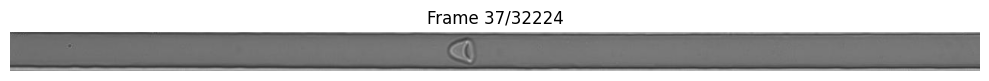

Frame 37/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


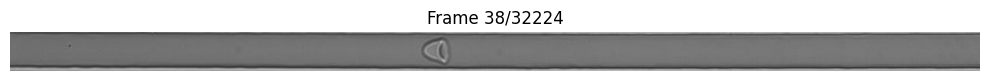

Frame 38/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


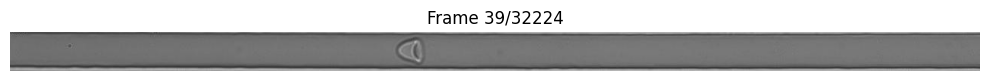

Frame 39/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


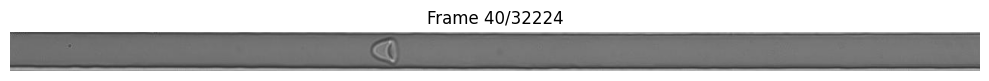

Frame 40/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


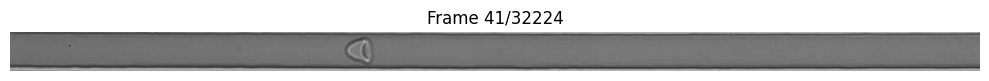

Frame 41/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


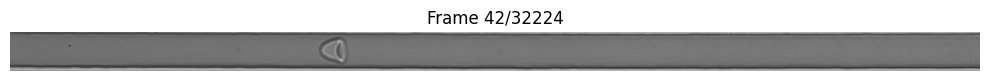

Frame 42/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


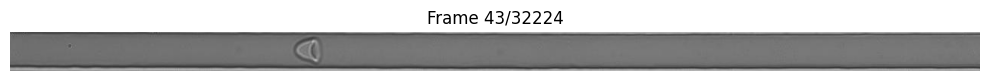

Frame 43/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


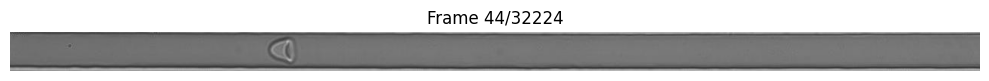

Frame 44/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


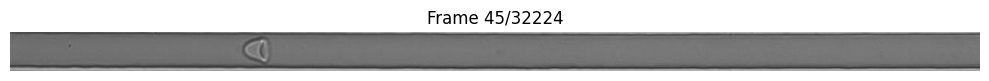

Frame 45/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


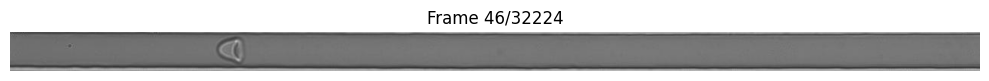

Frame 46/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


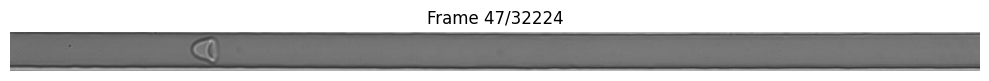

Frame 47/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


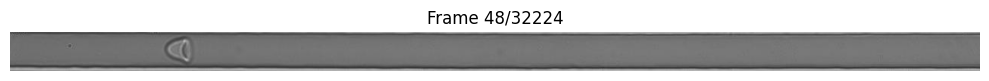

Frame 48/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


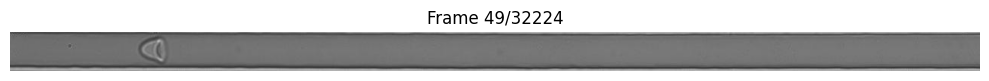

Frame 49/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


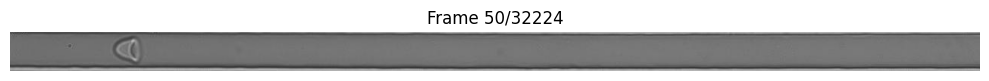

Frame 50/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


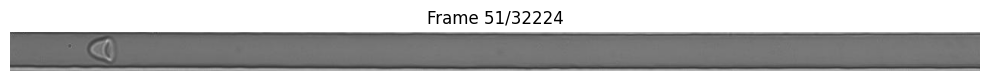

Frame 51/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


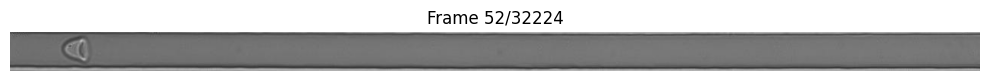

Frame 52/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


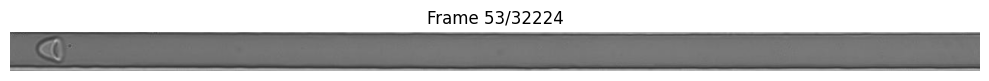

Frame 53/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


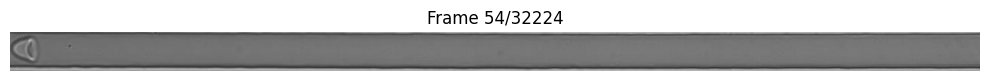

Frame 54/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


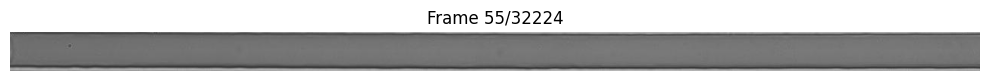

Frame 55/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


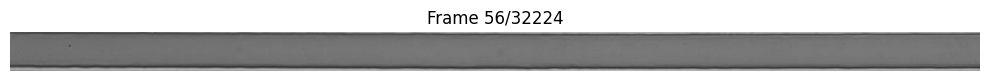

Frame 56/32224


Enter command (ENTER=next, b=back, j=jump, s=save, q=quit):  


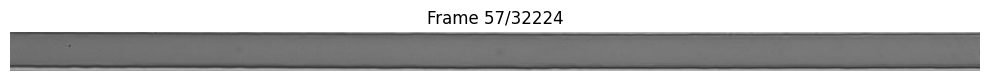

Frame 57/32224


KeyboardInterrupt: Interrupted by user

In [127]:
import cv2
import matplotlib.pyplot as plt
import os

def main():
    # Open the video
    cap = cv2.VideoCapture(VIDEO_PATH)
    if not cap.isOpened():
        raise RuntimeError(f"Could not open {VIDEO_PATH!r}")

    nb_total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Video has {nb_total_frames} frames")
    print("Controls:")
    print("  ENTER - Next frame")
    print("  'b' + ENTER - Go back one frame")
    print("  'j' + ENTER - Jump to specific frame")
    print("  's' + ENTER - Save current frame as background reference")
    print("  'q' + ENTER - Quit")
    print()

    frame_idx = 0
    saved_background = False
    begin_at = 0

    while True:
        # Read current frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()
        if not ret:
            print("End of video reached")
            break
        if frame_idx < begin_at:
            frame_idx += 1
            continue

        # Convert BGR to RGB for matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Display frame
        plt.figure(figsize=(10, 8))
        plt.imshow(frame_rgb)
        plt.title(f"Frame {frame_idx}/{nb_total_frames-1}")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
        print(f"Frame {frame_idx}/{nb_total_frames-1}")
        
        # Wait for user input
        user_input = input("Enter command (ENTER=next, b=back, j=jump, s=save, q=quit): ").strip().lower()
        
        if user_input == 'q':
            break
        elif user_input == '' or user_input == 'n':  # Enter or 'n' for next
            frame_idx += 1
            if frame_idx >= nb_total_frames:
                print("Reached end of video")
                frame_idx = nb_total_frames - 1
        elif user_input == 'b':  # Back
            frame_idx -= 1
            if frame_idx < 0:
                frame_idx = 0
        elif user_input == 'j':  # Jump to frame
            try:
                target_frame = int(input("Enter frame number: "))
                if 0 <= target_frame < nb_total_frames:
                    frame_idx = target_frame
                else:
                    print(f"Frame must be between 0 and {nb_total_frames-1}")
            except ValueError:
                print("Invalid frame number")
        elif user_input == 's':  # Save background
            bg_filename = f"background_frame_{frame_idx:05d}.png"
            # Save in BGR format (original cv2 format)
            cv2.imwrite(bg_filename, frame)
            print(f"Saved background frame as: {bg_filename}")
            saved_background = True

    cap.release()
    
    if saved_background:
        print("\nBackground frame saved! Use this frame number in the detection script.")
    else:
        print(f"\nRecommendation: Choose a frame with minimal objects (like frame 0) as background.")

if __name__ == "__main__":
    main()

#### Step 2: find cells

In [129]:
import cv2
import os
import numpy as np

# ─────────────────────────────────────────────────────────────────────────────────
# PARAMETERS
#BACKGROUND_FRAME_IDX = -1              # Frame index to use as background (from frame viewer)
#🔥 TO SET at the top of this notebook

# Detection parameters
DIFF_THRESH = 20#30                    # Per-pixel difference threshold (0-255)
MIN_CONTOUR_AREA = 100                 # Minimum area for detected objects
MAX_CONTOUR_AREA = 1000                # Maximum area for detected objects
MARGIN_X = 10                          # Extra pixels to pad left/right when cropping
MARGIN_Y = 10                          # Extra pixels to pad top/bottom when cropping

# Morphological operations parameters
MORPH_KERNEL_SIZE = 5                  # Size of morphological kernel
CLOSE_ITERATIONS = 2                   # Iterations for morphological closing
OPEN_ITERATIONS = 1                    # Iterations for morphological opening

# Processing parameters
SKIP_FRAMES = 1                        # Process every N frames (1 = process all)
MAX_OBJECTS = None                     # Maximum number of objects to detect
EDGE_BUFFER_COLS = 20                  # Minimum columns of background needed at left/right edges
# ─────────────────────────────────────────────────────────────────────────────────


def preprocess_mask(mask, kernel_size=5, close_iter=2, open_iter=1):
    """Apply morphological operations to clean up the binary mask"""
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    
    # Close small gaps
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=close_iter)
    
    # Remove small noise
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=open_iter)
    
    return mask

def check_object_fully_entered(frame, background, bbox, edge_buffer_cols, diff_thresh):
    """Check if object is fully entered by verifying edge columns are background-like"""
    x0, y0, x1, y1 = bbox
    h, w = frame.shape[:2]
    
    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_bg = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
    
    # Check left edge buffer
    left_buffer_start = max(0, x0 - edge_buffer_cols)
    left_buffer_end = x0
    if left_buffer_end > left_buffer_start:
        left_region_frame = gray_frame[y0:y1, left_buffer_start:left_buffer_end]
        left_region_bg = gray_bg[y0:y1, left_buffer_start:left_buffer_end]
        left_diff = cv2.absdiff(left_region_frame, left_region_bg)
        left_mean_diff = np.mean(left_diff)
        if left_mean_diff > diff_thresh * 0.5:  # Half threshold for edge checking
            return False, "left_edge_not_clear"
    
    # Check right edge buffer  
    right_buffer_start = x1
    right_buffer_end = min(w, x1 + edge_buffer_cols)
    if right_buffer_end > right_buffer_start:
        right_region_frame = gray_frame[y0:y1, right_buffer_start:right_buffer_end]
        right_region_bg = gray_bg[y0:y1, right_buffer_start:right_buffer_end]
        right_diff = cv2.absdiff(right_region_frame, right_region_bg)
        right_mean_diff = np.mean(right_diff)
        if right_mean_diff > diff_thresh * 0.5:  # Half threshold for edge checking
            return False, "right_edge_not_clear"
    
    # Check if object is too close to frame edges
    if x0 < edge_buffer_cols:
        return False, "too_close_to_left_edge"
    if x1 > (w - edge_buffer_cols):
        return False, "too_close_to_right_edge"
    
    return True, "fully_entered"

def detect_and_crop_objects(frame, background, frame_idx, output_dir,
                           diff_thresh=30, min_area=100, max_area=50000,
                           margin_x=10, margin_y=10, save_objects=True):
    """Detect objects by comparing frame to background and optionally crop them"""
    
    h, w = frame.shape[:2]
    
    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_bg = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
    
    # Compute absolute difference
    diff = cv2.absdiff(gray_frame, gray_bg)
    
    # Apply threshold to create binary mask
    _, mask = cv2.threshold(diff, diff_thresh, 255, cv2.THRESH_BINARY)
    
    # Clean up the mask with morphological operations
    mask = preprocess_mask(mask, MORPH_KERNEL_SIZE, CLOSE_ITERATIONS, OPEN_ITERATIONS)
    
    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    detected_objects = []
    valid_contours = []
    
    # Filter contours by area and extract bounding boxes
    for contour in contours:
        area = cv2.contourArea(contour)
        if min_area <= area <= max_area:
            valid_contours.append(contour)
    
    # Sort contours by area (largest first)
    valid_contours.sort(key=cv2.contourArea, reverse=True)
    
    for i, contour in enumerate(valid_contours):
        # Get bounding rectangle
        x, y, box_w, box_h = cv2.boundingRect(contour)
        
        # Add margins
        x0_crop = max(0, x - margin_x)
        y0_crop = 0#max(0, y - 2*margin_y)
        x1_crop = min(w, x + box_w + 2*margin_x)
        y1_crop = h#min(h, y + box_h + margin_y)
        
        # Store object info (always do this for detection logic)
        detected_objects.append({
            'bbox': (x0_crop, y0_crop, x1_crop, y1_crop),
            'area': cv2.contourArea(contour)
        })
        
        # Only save if requested (controlled by the main loop logic)
        if save_objects:
            cropped = frame[y0_crop:y1_crop, x0_crop:x1_crop]
            
            if cropped.size > 0:  # Make sure crop is valid
                # Save the cropped object
                filename = f"object_frame_{frame_idx:05d}_obj_{i+1:02d}.png"
                filepath = os.path.join(output_dir, filename)
                cv2.imwrite(filepath, cropped)
                
                detected_objects[-1]['filename'] = filename
    
    return detected_objects, mask

def main():
    # Create output directory
    os.makedirs(OUTPUT_DIR_tmp, exist_ok=True)
    
    # Open video
    cap = cv2.VideoCapture(VIDEO_PATH)
    if not cap.isOpened():
        raise RuntimeError(f"Could not open {VIDEO_PATH!r}")
    
    nb_total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Video has {nb_total_frames} frames")
    
    # Read background frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, BACKGROUND_FRAME_IDX)
    ret, background_frame = cap.read()
    if not ret:
        raise RuntimeError(f"Failed to read background frame {BACKGROUND_FRAME_IDX}")
    
    # Save background reference
    bg_ref_path = os.path.join(OUTPUT_DIR_tmp, f"background_reference_frame_{BACKGROUND_FRAME_IDX:05d}.png")
    cv2.imwrite(bg_ref_path, background_frame)
    print(f"Background reference saved: {bg_ref_path}")
    
    # Process all frames with state tracking
    batch_count = 0
    frame_idx = 0
    waiting_for_clear_frame = False  # State: True = wait for no objects, False = can save objects
    
    print(f"Processing frames with parameters:")
    print(f"  Difference threshold: {DIFF_THRESH}")
    print(f"  Min contour area: {MIN_CONTOUR_AREA}")
    print(f"  Max contour area: {MAX_CONTOUR_AREA}")
    print(f"  Skip frames: {SKIP_FRAMES}")
    print(f"  Edge buffer columns: {EDGE_BUFFER_COLS}")
    print(f"  Logic: Save only fully entered objects, then wait for clear frame")
    print()

    pbar = tqdm(total=nb_total_frames)
    while frame_idx < nb_total_frames and (MAX_OBJECTS is not None and batch_count < MAX_OBJECTS or MAX_OBJECTS is None):
        # Read frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()
        if not ret:
            break
        
        # Skip frames if specified
        if frame_idx % SKIP_FRAMES != 0:
            frame_idx += 1
            continue
        
        # Detect objects (but don't necessarily save them yet)
        detected_objects, debug_mask = detect_and_crop_objects(
            frame, background_frame, frame_idx, OUTPUT_DIR_tmp,
            DIFF_THRESH, MIN_CONTOUR_AREA, MAX_CONTOUR_AREA,
            MARGIN_X, MARGIN_Y, save_objects=False  # Don't save yet, we'll control this
        )
        
        # Filter objects to only include those fully entered
        fully_entered_objects = []
        for obj_info in detected_objects:
            is_fully_entered, reason = check_object_fully_entered(
                frame, background_frame, obj_info['bbox'], EDGE_BUFFER_COLS, DIFF_THRESH
            )
            if is_fully_entered:
                fully_entered_objects.append(obj_info)
            #else:
                # Debug info for partially entered objects
            #    print(f"Frame {frame_idx:5d}: Object not fully entered ({reason})")
        
        objects_found = len(fully_entered_objects) > 0
        
        if objects_found and not waiting_for_clear_frame:
            # New objects detected and we're allowed to save → save them
            saved_objects = []
            for i, obj_info in enumerate(fully_entered_objects):
                # Re-crop and save the object
                x0, y0, x1, y1 = obj_info['bbox']
                cropped = frame[y0:y1, x0:x1]
                
                if cropped.size > 0:
                    batch_count += 1
                    filename = f"cell_{batch_count:03d}_frame_{frame_idx:05d}_obj_{i+1:02d}.png"
                    filepath = os.path.join(OUTPUT_DIR_tmp, filename)
                    cv2.imwrite(filepath, cropped)
                    saved_objects.append({
                        'filename': filename,
                        'bbox': obj_info['bbox'],
                        'area': obj_info['area']
                    })
            
            #print(f"Frame {frame_idx:5d}: NEW batch detected → saved {len(saved_objects)} fully entered objects")
            #for obj in saved_objects:
            #    print(f"  → {obj['filename']} (area: {obj['area']:.0f})")
            
            # Now wait for clear frame before allowing new saves
            waiting_for_clear_frame = True
            
        #elif objects_found and waiting_for_clear_frame:
            # Objects still present, but we're waiting for them to disappear
            #print(f"Frame {frame_idx:5d}: Fully entered objects still present (waiting for clear frame)")
            
        elif not objects_found and waiting_for_clear_frame:
            # No fully entered objects detected and we were waiting → reset to allow new detections
            #print(f"Frame {frame_idx:5d}: Clear frame detected → ready for new objects")
            waiting_for_clear_frame = False
            
        #elif not objects_found and not waiting_for_clear_frame:
            # No fully entered objects and we're already ready → just continue
            #print(f"Frame {frame_idx:5d}: No fully entered objects")
        
        # Optionally save debug mask (uncomment if you want to see detection masks)
        # debug_path = os.path.join(OUTPUT_DIR_tmp, f"debug_mask_frame_{frame_idx:05d}.png")
        # cv2.imwrite(debug_path, debug_mask)
        
        frame_idx += SKIP_FRAMES

        # Progress indicator
        pbar.update()
        #if frame_idx % 100 == 0:
        #    print(f"Progress: {frame_idx}/{nb_total_frames} frames processed, {batch_count} batches saved")

    pbar.close()
    cap.release()
    
    print(f"\nProcessing complete!")
    print(f"Total object batches detected and cropped: {batch_count}")
    print(f"Output directory: {OUTPUT_DIR_tmp}")
    print(f"Background frame used: {BACKGROUND_FRAME_IDX}")
    print(f"Final state: {'Waiting for clear frame' if waiting_for_clear_frame else 'Ready for new objects'}")

if __name__ == "__main__":
    main()

Video has 32225 frames
Background reference saved: /home/alex/dev/python/tx_rbc/tx_shared/data/videos/nouaman_2024/blood_donor_3/cropped_croissant_tmp/background_reference_frame_00056.png
Processing frames with parameters:
  Difference threshold: 20
  Min contour area: 100
  Max contour area: 1000
  Skip frames: 1
  Edge buffer columns: 20
  Logic: Save only fully entered objects, then wait for clear frame


















  0%|          | 0/32225 [00:00<?, ?it/s]














  0%|          | 34/32225 [00:00<01:38, 328.10it/s]














  0%|          | 67/32225 [00:00<01:49, 294.51it/s]














  0%|          | 97/32225 [00:00<01:48, 295.23it/s]














  0%|          | 130/32225 [00:00<01:44, 307.29it/s]














  0%|          | 161/32225 [00:00<01:45, 304.12it/s]














  1%|          | 192/32225 [00:00<01:48, 295.83it/s]














  1%|          | 222/32225 [00:00<01:48, 294.37it/s]














  1%|          | 252/32225 [00:00<01:48, 295.83it/s]














  1%|          | 284/32225 [00:00<01:46, 301.00it/s]














  1%|          | 315/32225 [00:01<01:52, 284.58it/s]














  1%|          | 344/32225 [00:01<01:54, 278.36it/s]














  1%|          | 374/32225 [00:01<01:52, 284.07it/s]














  1%|▏         | 404/32225 [00:01<01:50, 287.05it/s]














  1%|▏         | 435/32225 [00:01<01:49, 291.28it/s]











Processing complete!
Total object batches detected and cropped: 1354
Output directory: /home/alex/dev/python/tx_rbc/tx_shared/data/videos/nouaman_2024/blood_donor_3/cropped_croissant_tmp
Background frame used: 56
Final state: Ready for new objects


## Segment extracted cells (CellPose)

In [1]:
import sys, importlib
sys.path.append('../')
from scripts import cellpose
importlib.reload(cellpose);

In [130]:
images, filenames = cellpose.LoadImages(OUTPUT_DIR_tmp, "png", lambda name: "cell" in name, grayscale=True)
print(len(images))

masks = cellpose.SegmentImages(images, diameter=40)

1354


no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds found in get_masks_torch - no masks found.
no seeds fou

In [131]:
print(len(masks))

1354


In [132]:
# Only keep images where exactly ONE cell was found (Avoid aggregate)
valid_images = []
valid_filenames = []
valid_masks =  []
for f, i, m in zip(filenames, images, masks):
    if len(np.unique(m)) == 2:
        valid_images.append(i)
        valid_filenames.append(f)
        valid_masks.append(m)
print(len(valid_images))

244


### Demo

(51, 61) (51, 61)
(51, 61)


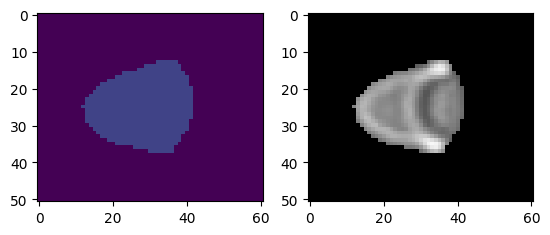

(50, 65) (50, 65)
(50, 65)


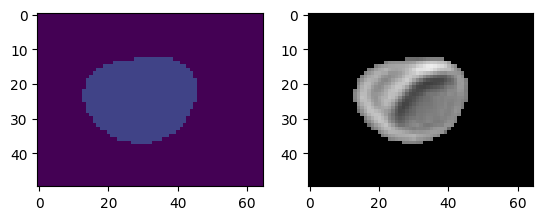

(52, 62) (52, 62)
(52, 62)


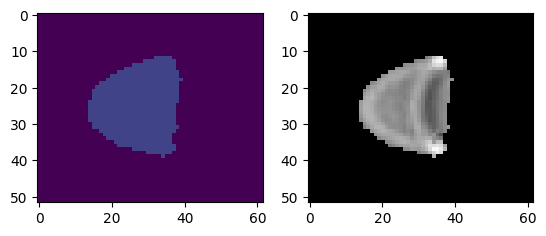

(52, 57) (52, 57)
(52, 57)


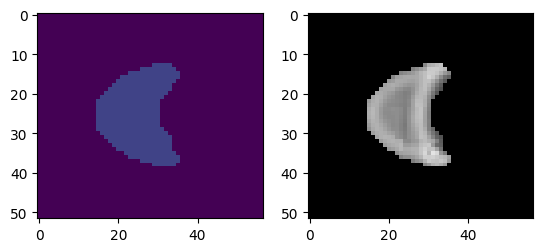

(52, 83) (52, 83)
(52, 83)


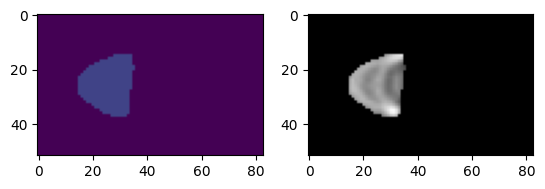

In [92]:
import matplotlib.pyplot as plt
for img, m in zip(images[:5], masks[:5]): 
    print(img.shape, m.shape)
    print(m.shape)
    plt.figure()
    plt.subplot(121)
    plt.imshow(m, vmin=0, vmax=5)
    plt.subplot(122)
    plt.imshow(img*np.array(m>0), cmap='gray', vmin=0, vmax=255)
    plt.show()

(51, 61) (51, 61)
(51, 61)


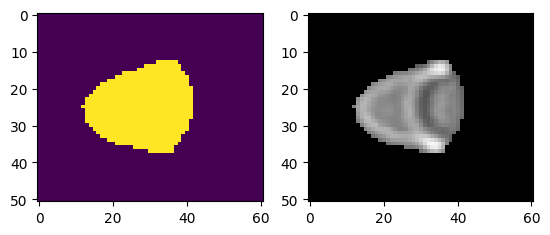

(50, 65) (50, 65)
(50, 65)


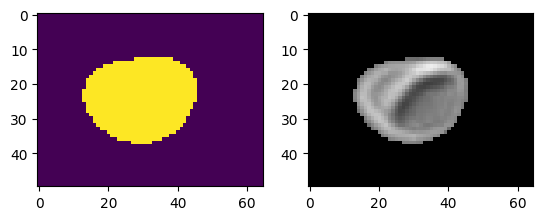

(52, 62) (52, 62)
(52, 62)


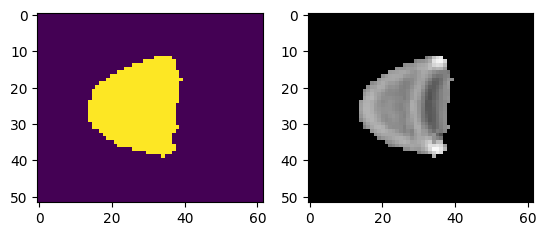

(52, 57) (52, 57)
(52, 57)


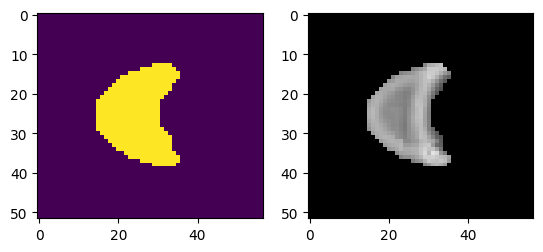

(52, 83) (52, 83)
(52, 83)


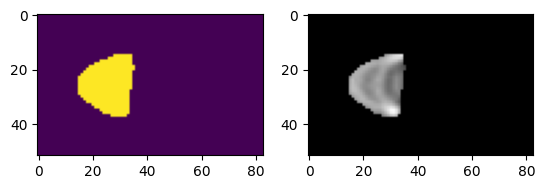

In [93]:
import matplotlib.pyplot as plt
for img, m in zip(valid_images[:5], valid_masks[:5]): 
    print(img.shape, m.shape)
    print(m.shape)
    plt.figure()
    plt.subplot(121)
    plt.imshow(m)
    plt.subplot(122)
    plt.imshow(img*np.array(m>0), cmap='gray', vmin=0, vmax=255)
    plt.show()

### Extraction & Saving

Save to `OUTPUT_DIR_extracted` the extracted cells (=cells without background) cropped (no black padding compared to plots above).

In [133]:
import matplotlib.pyplot as plt
from os import listdir
from os.path import join as os_path_join
from PIL import Image

# Create output directory
os.makedirs(OUTPUT_DIR_extracted, exist_ok=True)

for filename, img, m in zip(valid_filenames, valid_images, valid_masks): 
    image = Image.fromarray(img * np.array(m > 0))
    imageBox = image.getbbox()
    cropped = image.crop(imageBox)
    cropped.save(os_path_join(OUTPUT_DIR_extracted, filename))

## Filter (slipper)

In [123]:
# Only keep images whose proportion of non-zeros pixels is less than : 
THRESHOLD_PERCENT = 70

# And only keep images which has less #nonzero_pixels smaller than:
ABS_NB_NZ_PIXELS = 450 # prevent cell aggregate

# Only keep images that have a ratio difference r1 - r2 ...
# r1 = nb_NZ_pixels_top / nb_NZ_pixels
# r2 = nb_NZ_pixels_bottom / nb_NZ_pixels
# ... greater than: 
THRESHOLD_RATIO = .1 # to keep images with well defined slipper tail

In [124]:
import os
import cv2
import numpy as np
import argparse
from pathlib import Path
import shutil
import pandas as pd


def filter_images(input_folder, output_folder, threshold_percent):
    """
    Filter images based on non-zero pixel percentage threshold.
    Save filenames + number of pixels in each up/down part in a metadata file.
    Also save the total number of pixel of the image (=size).

    Note: The number of pixels saved is "how much non zeros pixels are present
    in the top half of the image?", same for bottom half. This allow inference on
    the position of the slipper tails.
    
    Args:
        input_folder (str): Path to input folder containing images
        output_folder (str): Path to output folder for filtered images
        threshold_percent (float): Minimum percentage of non-zero pixels required
    """
    metadata = mda.CreateLoad()
    
    # Create output folder if it doesn't exist
    Path(output_folder).mkdir(parents=True, exist_ok=True)
    
    # Supported image extensions
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif', '.webp'}
    
    # Statistics
    total_images = 0
    filtered_images = 0
    
    print(f"Processing images from: {input_folder}")
    print(f"Output folder: {output_folder}")
    print(f"Threshold: {threshold_percent}% non-zero pixels")
    print("-" * 50)
    
    # Process all images in input folder
    for file_path in Path(input_folder).iterdir():
        if file_path.is_file() and file_path.suffix.lower() in image_extensions:
            total_images += 1
            
            # Calculate non-zero percentages
            img = cv2.imread(str(file_path), cv2.IMREAD_GRAYSCALE)
            nonzero_pixels = np.count_nonzero(img) # Count non-zero pixels
            total_pixels = img.shape[0] * img.shape[1] # To Calculate percentage below
            nonzero_percent = (nonzero_pixels / total_pixels) * 100
            nonzero_top = np.count_nonzero(img[:img.shape[0]//2 + 1]) # Include middle row in top half
            nonzero_bottom = np.count_nonzero( img[img.shape[0]//2 + 1:])
            nonzero_left =  np.count_nonzero(img[:,:img.shape[1]//2 + 1]) # Include middle row in top half
            nonzero_right =  np.count_nonzero(img[:,img.shape[1]//2 + 1:])
            
            print(f"Processing: {file_path.name} - {nonzero_percent:.2f}% non-zero pixels", end="")

            ratio_top = nonzero_top / nonzero_pixels
            ratio_bot = nonzero_bottom / nonzero_pixels
            ratio_left = nonzero_left / nonzero_pixels
            ratio_right = nonzero_right / nonzero_pixels
            good_LR_ratio = False
            if ORIENTATION == 'L':
                good_LR_ratio = ratio_left > ratio_right
            else:
                good_LR_ratio = ratio_left < ratio_right
            
            print((f"Processing: {file_path.name} - {nonzero_percent:.2f}% non-zero pixels. "
                  f"abs(r1 - r2) = {abs(ratio_top - ratio_bot):.02f}"), end="")
            
            # Check if image meets threshold
            if nonzero_percent < threshold_percent and nonzero_pixels < ABS_NB_NZ_PIXELS and \
                abs(ratio_top - ratio_bot) > THRESHOLD_RATIO and good_LR_ratio:
                # Copy image to output folder
                output_path = Path(output_folder) / file_path.name
                shutil.copy2(file_path, output_path)
                filtered_images += 1
                new_row = {
                    'filename': file_path.name,
                    'path': file_path,
                    'nb_nonzero_top': nonzero_top,
                    'nb_nonzero_bottom':nonzero_bottom,
                    'nb_nonzero': nonzero_pixels
                }
                metadata =  pd.concat([metadata, pd.DataFrame([new_row])], ignore_index=True)
                print(" ✓ Copied")
            else:
                print(" ✗ Skipped")

    mda.SaveMetadata(metadata)
    
    print("-" * 50)
    print(f"Summary:")
    print(f"Total images processed: {total_images}")
    print(f"Images copied: {filtered_images}")
    print(f"Images skipped: {total_images - filtered_images}")
    print(f"Filter rate: {(filtered_images/total_images*100):.1f}%" if total_images > 0 else "No images found")

filter_images(OUTPUT_DIR_extracted, OUTPUT_DIR_filtered, THRESHOLD_PERCENT)

Processing images from: /home/alex/dev/python/tx_rbc/tx_shared/data/videos/nouaman_2024/blood_donor_3/cropped_croissant_extracted
Output folder: /home/alex/dev/python/tx_rbc/tx_shared/data/videos/nouaman_2024/blood_donor_3/cropped_croissant_filtered
Threshold: 70% non-zero pixels
--------------------------------------------------
Processing: cell_313_frame_10188_obj_01.png - 66.67% non-zero pixelsProcessing: cell_313_frame_10188_obj_01.png - 66.67% non-zero pixels. abs(r1 - r2) = 0.30 ✓ Copied
Processing: cell_617_frame_23538_obj_01.png - 64.34% non-zero pixelsProcessing: cell_617_frame_23538_obj_01.png - 64.34% non-zero pixels. abs(r1 - r2) = 0.20 ✓ Copied
Processing: cell_409_frame_13390_obj_01.png - 64.06% non-zero pixelsProcessing: cell_409_frame_13390_obj_01.png - 64.06% non-zero pixels. abs(r1 - r2) = 0.38 ✓ Copied
Processing: cell_114_frame_03815_obj_01.png - 62.79% non-zero pixelsProcessing: cell_114_frame_03815_obj_01.png - 62.79% non-zero pixels. abs(r1 - r2) = 0.34 ✓ Copied


## Filter (croissant)

In [143]:
# And only keep images which has less #nonzero_pixels greater than:
ABS_NB_NZ_PIXELS_MIN = 350

# Only keep images that have a ratio difference r1 - r2 ...
# r1 = nb_NZ_pixels_top / nb_NZ_pixels
# r2 = nb_NZ_pixels_bottom / nb_NZ_pixels
# ... SMALLER than: 
THRESHOLD_RATIO = .05 # to keep symetric croissants (x-axis symetry)

In [144]:
import os
import cv2
import numpy as np
import argparse
from pathlib import Path
import shutil
import pandas as pd


def filter_images(input_folder, output_folder, threshold_percent):
    """
    Filter images based on non-zero pixel percentage threshold.
    Save filenames + number of pixels in each up/down part in a metadata file.
    Also save the total number of pixel of the image (=size).

    Note: The number of pixels saved is "how much non zeros pixels are present
    in the top half of the image?", same for bottom half. This allow inference on
    the position of the slipper tails.
    
    Args:
        input_folder (str): Path to input folder containing images
        output_folder (str): Path to output folder for filtered images
        threshold_percent (float): Minimum percentage of non-zero pixels required
    """
    metadata = mda.CreateLoad()
    
    # Create output folder if it doesn't exist
    Path(output_folder).mkdir(parents=True, exist_ok=True)
    
    # Supported image extensions
    image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif', '.webp'}
    
    # Statistics
    total_images = 0
    filtered_images = 0
    
    print(f"Processing images from: {input_folder}")
    print(f"Output folder: {output_folder}")
    print(f"Threshold: {threshold_percent}% non-zero pixels")
    print("-" * 50)
    
    # Process all images in input folder
    for file_path in Path(input_folder).iterdir():
        if file_path.is_file() and file_path.suffix.lower() in image_extensions:
            total_images += 1
            
            # Calculate non-zero percentages
            img = cv2.imread(str(file_path), cv2.IMREAD_GRAYSCALE)
            nonzero_pixels = np.count_nonzero(img) # Count non-zero pixels
            total_pixels = img.shape[0] * img.shape[1] # To Calculate percentage below
            nonzero_percent = (nonzero_pixels / total_pixels) * 100
            nonzero_top = np.count_nonzero(img[:img.shape[0]//2 + 1]) # Include middle row in top half
            nonzero_bottom = np.count_nonzero( img[img.shape[0]//2 + 1:])
            nonzero_left =  np.count_nonzero(img[:,:img.shape[1]//2 + 1]) # Include middle row in top half
            nonzero_right =  np.count_nonzero(img[:,img.shape[1]//2 + 1:])
            
            print(f"Processing: {file_path.name} - {nonzero_percent:.2f}% non-zero pixels", end="")

            ratio_top = nonzero_top / nonzero_pixels
            ratio_bot = nonzero_bottom / nonzero_pixels
            ratio_left = nonzero_left / nonzero_pixels
            ratio_right = nonzero_right / nonzero_pixels
            good_LR_ratio = False
            if ORIENTATION == 'L':
                good_LR_ratio = ratio_left < ratio_right
            else:
                good_LR_ratio = ratio_left > ratio_right
            
            print((f"Processing: {file_path.name} - {nonzero_percent:.2f}% non-zero pixels. "
                  f"abs(r1 - r2) = {abs(ratio_top - ratio_bot):.02f}"), end="")
            
            # Check if image meets threshold
            if nonzero_pixels > ABS_NB_NZ_PIXELS_MIN and abs(ratio_top - ratio_bot) < THRESHOLD_RATIO and good_LR_ratio:
                # Copy image to output folder
                output_path = Path(output_folder) / file_path.name
                shutil.copy2(file_path, output_path)
                filtered_images += 1
                new_row = {
                    'filename': file_path.name,
                    'path': file_path,
                    'nb_nonzero_top': nonzero_top,
                    'nb_nonzero_bottom':nonzero_bottom,
                    'nb_nonzero': nonzero_pixels
                }
                metadata =  pd.concat([metadata, pd.DataFrame([new_row])], ignore_index=True)
                print(" ✓ Copied")
            else:
                print(" ✗ Skipped")

    mda.SaveMetadata(metadata)
    
    print("-" * 50)
    print(f"Summary:")
    print(f"Total images processed: {total_images}")
    print(f"Images copied: {filtered_images}")
    print(f"Images skipped: {total_images - filtered_images}")
    print(f"Filter rate: {(filtered_images/total_images*100):.1f}%" if total_images > 0 else "No images found")

filter_images(OUTPUT_DIR_extracted, OUTPUT_DIR_filtered, THRESHOLD_PERCENT)

Processing images from: /home/alex/dev/python/tx_rbc/tx_shared/data/videos/nouaman_2024/blood_donor_1/cropped_croissant_extracted
Output folder: /home/alex/dev/python/tx_rbc/tx_shared/data/videos/nouaman_2024/blood_donor_1/cropped_croissant_filtered
Threshold: 70% non-zero pixels
--------------------------------------------------
Processing: cell_130_frame_11646_obj_01.png - 74.48% non-zero pixelsProcessing: cell_130_frame_11646_obj_01.png - 74.48% non-zero pixels. abs(r1 - r2) = 0.03 ✓ Copied
Processing: cell_220_frame_17702_obj_01.png - 75.93% non-zero pixelsProcessing: cell_220_frame_17702_obj_01.png - 75.93% non-zero pixels. abs(r1 - r2) = 0.06 ✗ Skipped
Processing: cell_614_frame_28038_obj_01.png - 75.99% non-zero pixelsProcessing: cell_614_frame_28038_obj_01.png - 75.99% non-zero pixels. abs(r1 - r2) = 0.02 ✓ Copied
Processing: cell_582_frame_25815_obj_01.png - 73.95% non-zero pixelsProcessing: cell_582_frame_25815_obj_01.png - 73.95% non-zero pixels. abs(r1 - r2) = 0.05 ✓ Copied

## Assemble all extracted cells

into one folder per shape

In [140]:
ROOT = os.path.join(cfg.paths.root_abs, cfg.paths.nouaman_from_root)
SLIPPERS = os.path.join(ROOT, 'slipper')
CROISSANTS = os.path.join(ROOT, 'croissant')
os.makedirs(ROOT, exist_ok=True)
os.makedirs(SLIPPERS, exist_ok=True)
os.makedirs(CROISSANTS, exist_ok=True)

In [146]:
from shutil import copy2


for donor_folder in sorted(os.listdir(os.path.join(cfg.paths.root_abs, cfg.paths.nouaman_videos_from_root))):
    if not "donor" in donor_folder:continue

    for dest_path, extracted_folder in [
        (CROISSANTS, os.path.join(os.path.join(cfg.paths.root_abs, cfg.paths.nouaman_videos_from_root, donor_folder, "cropped_croissant_filtered"))),
        (SLIPPERS, os.path.join(os.path.join(cfg.paths.root_abs, cfg.paths.nouaman_videos_from_root, donor_folder, "cropped_slipper_filtered")))
    ]:

        for cell_file in os.listdir(extracted_folder):
            copy2(
                src=os.path.join(extracted_folder, cell_file),
                dst=os.path.join(dest_path, cell_file)
            )

# Crop images

Crop images around cells, to make them less wide. 💡 Hypothesis: when evaluated with videos frames, the model couldn't find the cells. Maybe because the images were too wide.

In [2]:
def fullsize_bbox_to_yolo_bbox(bbox, image_width, image_height):
    
    x_min, y_min, x_max, y_max = bbox
    if x_min < 0 or y_min < 0 or x_max >= image_width or y_max >= image_height:
        return None
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    width = (x_max - x_min)
    height = (y_max - y_min)
    x_center /= image_width
    y_center /= image_height
    width /= image_width
    height /= image_height

    return x_center, y_center, width, height

In [8]:
import sys, importlib
sys.path.append('../')
from scripts import cellpose
importlib.reload(cellpose);

In [60]:
# Only keep images whose proportion of non-zeros pixels is less than : 
SLIPPER_THRESHOLD_PERCENT = 70

# And only keep images which has less #nonzero_pixels smaller than:
SLIPPER_ABS_NB_NZ_PIXELS = 450 # prevent cell aggregate

# Only keep images that have a ratio difference r1 - r2 ...
# r1 = nb_NZ_pixels_top / nb_NZ_pixels
# r2 = nb_NZ_pixels_bottom / nb_NZ_pixels
# ... greater than: 
SLIPPER_THRESHOLD_RATIO = .1 # to keep images with well defined slipper tail


# And only keep images which has less #nonzero_pixels greater than:
CROISSANT_ABS_NB_NZ_PIXELS_MIN = 350

# Only keep images that have a ratio difference r1 - r2 ...
# r1 = nb_NZ_pixels_top / nb_NZ_pixels
# r2 = nb_NZ_pixels_bottom / nb_NZ_pixels
# ... SMALLER than: 
CROISSANT_THRESHOLD_RATIO = .15 # to keep symetric croissants (x-axis symetry)

Video has 32225 frames
Processing frames with parameters:
  Difference threshold: 20
  Min contour area: 100
  Max contour area: 1000
  Skip frames: 1
  Edge buffer columns: 20
  Logic: Save only fully entered objects, then wait for clear frame




  0%|          | 34/32225 [00:00<01:36, 333.01it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.37it/s]


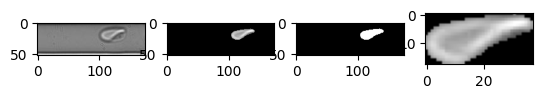


  0%|          | 97/32225 [00:00<04:41, 114.09it/s]

1




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.76it/s]


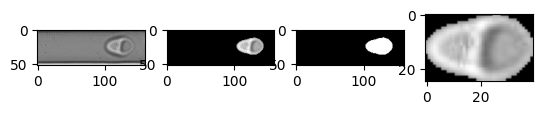


  0%|          | 152/32225 [00:01<05:11, 102.92it/s]

2




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


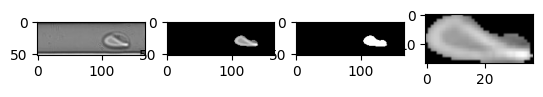


  1%|          | 201/32225 [00:02<05:40, 93.99it/s]

1



  1%|          | 230/32225 [00:02<04:24, 121.07it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.44it/s]


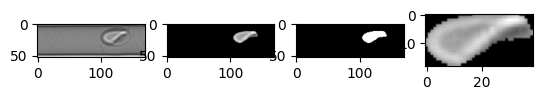


  1%|          | 282/32225 [00:02<05:17, 100.52it/s]

2



  1%|          | 310/32225 [00:03<04:14, 125.54it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


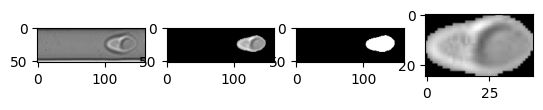


  1%|          | 363/32225 [00:03<04:51, 109.27it/s]

2



  2%|▏         | 640/32225 [00:04<01:52, 280.04it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  3.78it/s]


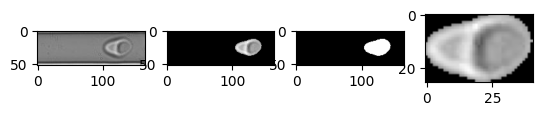


  2%|▏         | 670/32225 [00:05<04:47, 109.63it/s]

2



  2%|▏         | 785/32225 [00:05<02:35, 202.32it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


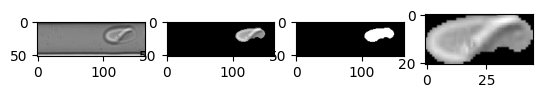


  3%|▎         | 840/32225 [00:06<04:51, 107.58it/s]

2




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


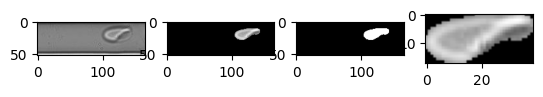


  3%|▎         | 890/32225 [00:07<06:19, 82.46it/s]

2




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.11it/s]


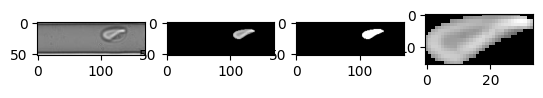


  3%|▎         | 944/32225 [00:08<06:26, 80.93it/s]

1



  3%|▎         | 973/32225 [00:08<04:59, 104.47it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  3.71it/s]


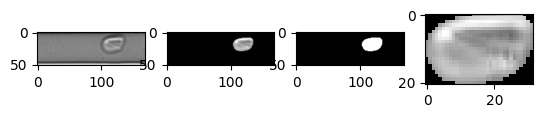


  3%|▎         | 1026/32225 [00:09<05:39, 91.81it/s]

2



  4%|▎         | 1173/32225 [00:09<02:23, 217.14it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


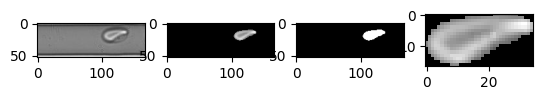


  4%|▍         | 1229/32225 [00:10<04:09, 124.07it/s]

1



  4%|▍         | 1322/32225 [00:10<02:30, 205.19it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.53it/s]


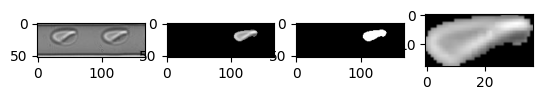


  4%|▍         | 1381/32225 [00:11<04:03, 126.50it/s]

1



  5%|▌         | 1694/32225 [00:12<01:53, 268.33it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.67it/s]


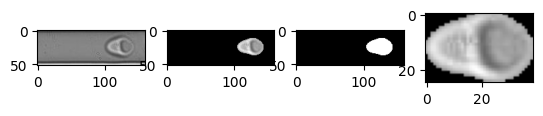


  5%|▌         | 1752/32225 [00:13<03:42, 136.86it/s]

2



  6%|▌         | 1845/32225 [00:13<02:19, 218.05it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


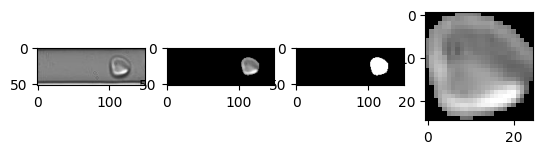

2



  7%|▋         | 2250/32225 [00:15<01:39, 302.25it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


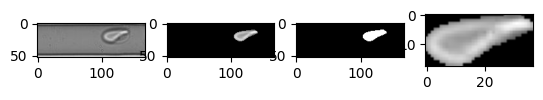


  7%|▋         | 2312/32225 [00:16<03:13, 154.97it/s]

1




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


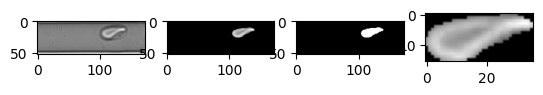


  7%|▋         | 2366/32225 [00:16<04:18, 115.30it/s]

1



  8%|▊         | 2658/32225 [00:17<01:51, 264.14it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  3.99it/s]


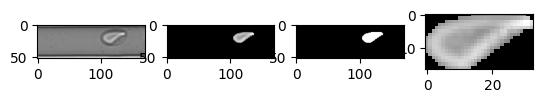


  8%|▊         | 2715/32225 [00:18<04:01, 122.07it/s]

1




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


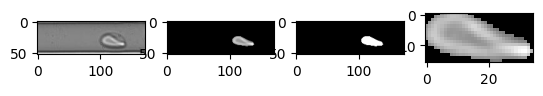


  9%|▊         | 2771/32225 [00:19<04:52, 100.81it/s]

2



 10%|▉         | 3194/32225 [00:20<01:39, 290.79it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.86it/s]


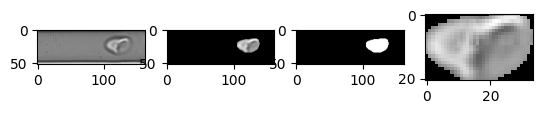


 10%|█         | 3252/32225 [00:21<03:34, 134.97it/s]

2



 11%|█         | 3544/32225 [00:22<01:42, 278.81it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


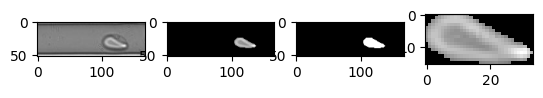


 11%|█         | 3573/32225 [00:23<04:07, 115.96it/s]

2



 12%|█▏        | 3793/32225 [00:24<01:42, 277.81it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.34it/s]


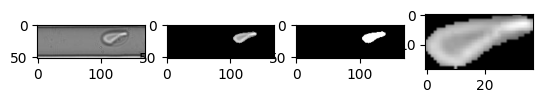


 12%|█▏        | 3852/32225 [00:24<03:16, 144.66it/s]

1



 13%|█▎        | 4074/32225 [00:25<01:49, 256.80it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.47it/s]


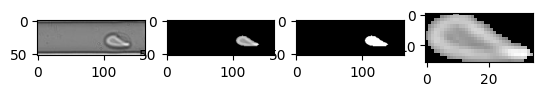


 13%|█▎        | 4101/32225 [00:26<04:23, 106.72it/s]

2




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.44it/s]


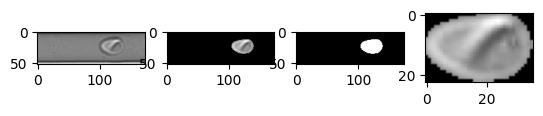


 13%|█▎        | 4153/32225 [00:26<04:57, 94.20it/s]

2



 13%|█▎        | 4214/32225 [00:27<03:07, 149.61it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


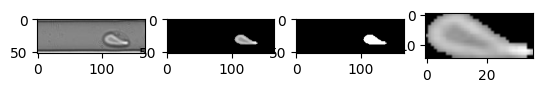


 13%|█▎        | 4266/32225 [00:28<07:30, 62.07it/s]

1



 14%|█▍        | 4663/32225 [00:30<01:41, 272.84it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.33it/s]


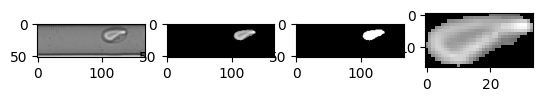


 15%|█▍        | 4721/32225 [00:30<03:25, 133.64it/s]

1



 15%|█▍        | 4813/32225 [00:31<02:08, 213.39it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.29it/s]


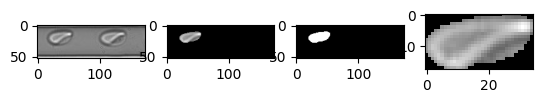


 15%|█▌        | 4869/32225 [00:31<03:39, 124.62it/s]

2



 15%|█▌        | 4899/32225 [00:32<03:00, 151.48it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.55it/s]


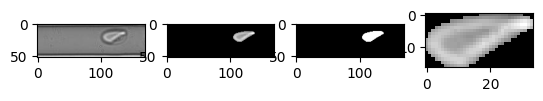


 15%|█▌        | 4951/32225 [00:32<04:10, 108.69it/s]

1



 17%|█▋        | 5353/32225 [00:34<01:41, 264.43it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.47it/s]


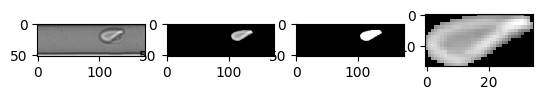


 17%|█▋        | 5411/32225 [00:34<03:21, 132.82it/s]

1



 17%|█▋        | 5557/32225 [00:35<01:50, 240.66it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.64it/s]


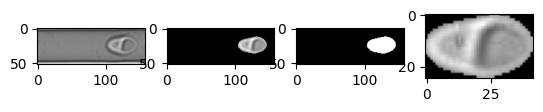


 17%|█▋        | 5611/32225 [00:36<03:31, 125.93it/s]

2



 18%|█▊        | 5893/32225 [00:37<01:45, 250.47it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.94it/s]


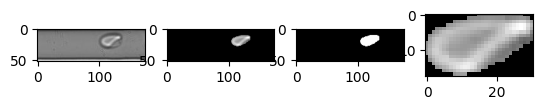


 18%|█▊        | 5950/32225 [00:37<03:21, 130.08it/s]

2



 19%|█▉        | 6193/32225 [00:38<01:35, 272.90it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


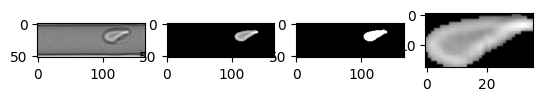


 19%|█▉        | 6252/32225 [00:39<03:00, 143.92it/s]

1



 20%|█▉        | 6314/32225 [00:39<02:10, 198.48it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


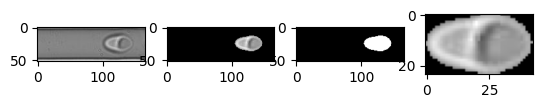


 20%|█▉        | 6372/32225 [00:40<03:14, 133.15it/s]

2



 20%|██        | 6459/32225 [00:40<02:06, 204.42it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.98it/s]


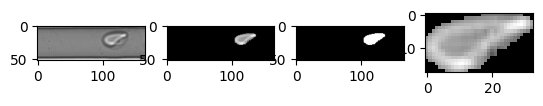


 20%|██        | 6517/32225 [00:41<03:11, 134.33it/s]

1



 21%|██        | 6800/32225 [00:42<01:27, 291.87it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


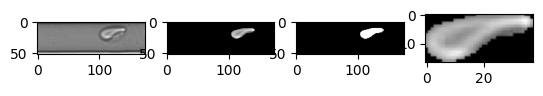


 21%|██▏       | 6861/32225 [00:42<02:48, 150.91it/s]

1



 24%|██▎       | 7606/32225 [00:45<01:23, 296.13it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


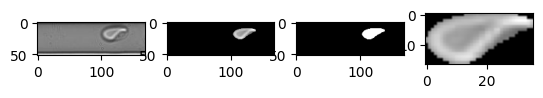


 24%|██▍       | 7666/32225 [00:46<02:44, 149.56it/s]

1



 24%|██▍       | 7729/32225 [00:46<02:00, 203.90it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


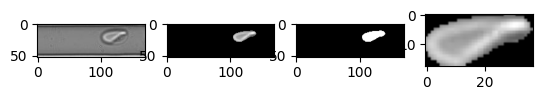


 24%|██▍       | 7787/32225 [00:46<02:58, 136.57it/s]

1



 25%|██▍       | 8009/32225 [00:47<01:25, 282.39it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


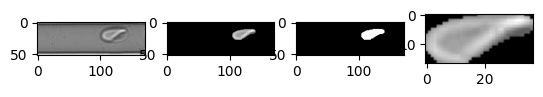


 25%|██▌       | 8072/32225 [00:48<02:38, 152.26it/s]

1




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.74it/s]


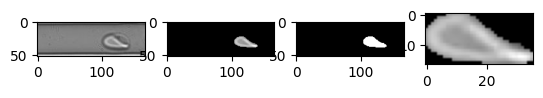


 25%|██▌       | 8128/32225 [00:48<03:18, 121.59it/s]

1




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.41it/s]


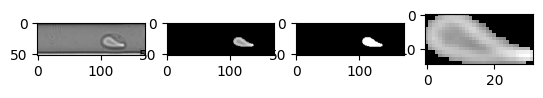


 25%|██▌       | 8182/32225 [00:49<03:42, 108.08it/s]

1



 26%|██▌       | 8344/32225 [00:50<01:36, 246.45it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


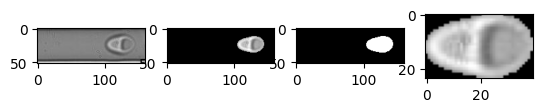


 26%|██▌       | 8405/32225 [00:50<02:40, 148.15it/s]

2



 27%|██▋       | 8561/32225 [00:51<01:31, 259.53it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.93it/s]


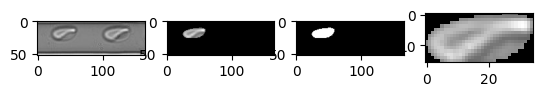


 27%|██▋       | 8621/32225 [00:51<02:41, 145.94it/s]

2



 28%|██▊       | 9141/32225 [00:53<01:20, 285.44it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.07it/s]


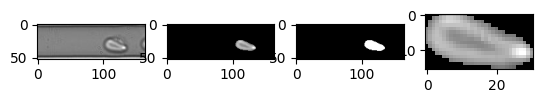


 29%|██▊       | 9198/32225 [00:54<02:51, 134.61it/s]

2



 29%|██▉       | 9321/32225 [00:54<01:37, 235.13it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


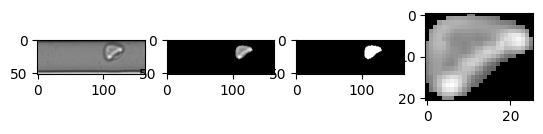


 29%|██▉       | 9350/32225 [00:55<03:21, 113.41it/s]

1




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.37it/s]


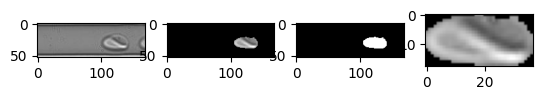


 29%|██▉       | 9403/32225 [00:56<03:35, 106.09it/s]

2



 31%|███       | 10028/32225 [00:58<01:10, 313.11it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


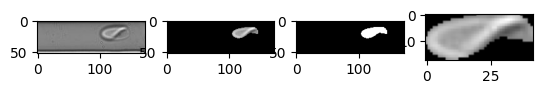


 31%|███▏      | 10088/32225 [00:58<02:23, 154.66it/s]

2



 32%|███▏      | 10202/32225 [00:59<01:33, 235.29it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


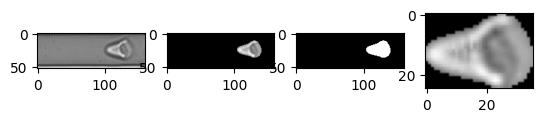


 32%|███▏      | 10259/32225 [00:59<02:48, 130.69it/s]

2



 32%|███▏      | 10322/32225 [01:00<01:56, 188.62it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


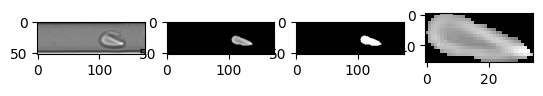


 32%|███▏      | 10380/32225 [01:00<02:52, 126.82it/s]

2



 33%|███▎      | 10562/32225 [01:01<01:31, 236.89it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


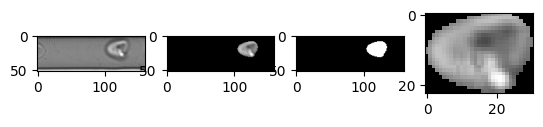


 33%|███▎      | 10614/32225 [01:02<03:28, 103.53it/s]

2



 33%|███▎      | 10642/32225 [01:02<02:47, 128.80it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.22it/s]


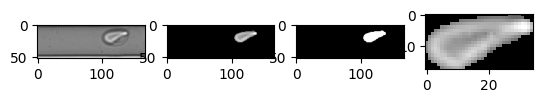


 33%|███▎      | 10697/32225 [01:03<03:24, 105.10it/s]

1



 33%|███▎      | 10786/32225 [01:03<01:56, 184.14it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


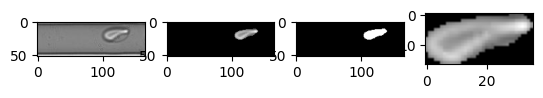


 34%|███▎      | 10845/32225 [01:05<04:49, 73.83it/s]

1



 34%|███▍      | 11062/32225 [01:05<01:27, 242.91it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.28it/s]


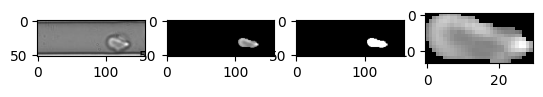


 35%|███▍      | 11122/32225 [01:06<02:27, 143.02it/s]

2



 36%|███▌      | 11523/32225 [01:07<01:09, 299.67it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.67it/s]


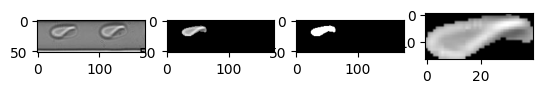


 36%|███▌      | 11583/32225 [01:08<02:21, 146.04it/s]

1




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


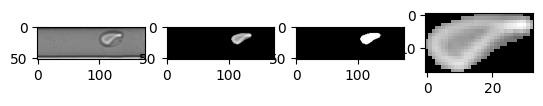


 36%|███▌      | 11637/32225 [01:09<03:01, 113.58it/s]

1



 37%|███▋      | 11998/32225 [01:10<01:10, 288.79it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


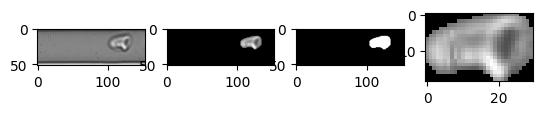


 37%|███▋      | 12055/32225 [01:11<02:18, 145.12it/s]

2



 38%|███▊      | 12144/32225 [01:11<01:32, 217.58it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


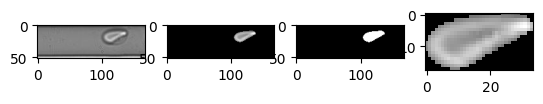


 38%|███▊      | 12204/32225 [01:11<02:24, 138.18it/s]

1



 38%|███▊      | 12399/32225 [01:12<01:10, 282.64it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.85it/s]


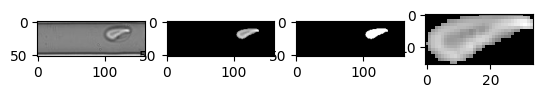


 39%|███▊      | 12431/32225 [01:13<02:35, 127.07it/s]

1




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


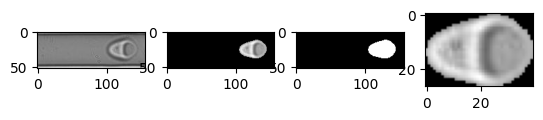


 39%|███▊      | 12462/32225 [01:13<03:37, 90.96it/s] 

2




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


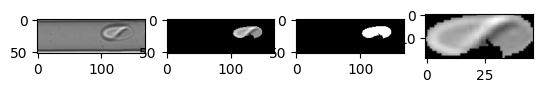


 39%|███▉      | 12508/32225 [01:14<03:46, 87.12it/s]

2



 39%|███▉      | 12537/32225 [01:14<02:57, 111.03it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


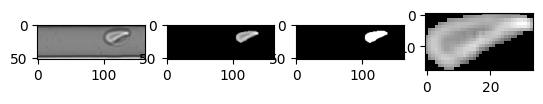


 39%|███▉      | 12558/32225 [01:15<04:21, 75.26it/s] 

1




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.96it/s]


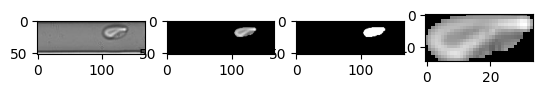


 39%|███▉      | 12611/32225 [01:15<03:58, 82.40it/s]

2




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


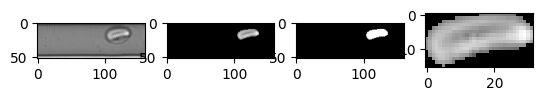


 39%|███▉      | 12661/32225 [01:16<03:48, 85.51it/s]

1



 42%|████▏     | 13438/32225 [01:18<01:02, 298.59it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


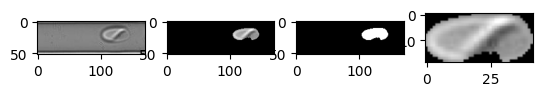


 42%|████▏     | 13498/32225 [01:19<02:03, 151.11it/s]

2



 43%|████▎     | 13900/32225 [01:20<01:01, 298.15it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


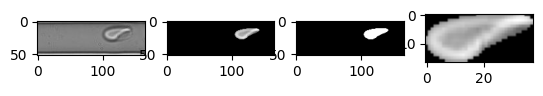


 43%|████▎     | 13960/32225 [01:21<01:59, 152.26it/s]

1




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


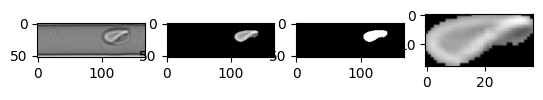


 44%|████▎     | 14018/32225 [01:22<02:32, 119.69it/s]

2




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.44it/s]


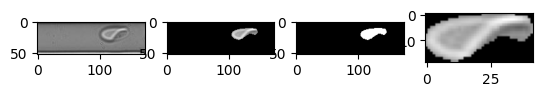


 44%|████▎     | 14066/32225 [01:22<02:59, 101.36it/s]

2



 44%|████▍     | 14217/32225 [01:23<01:18, 230.63it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


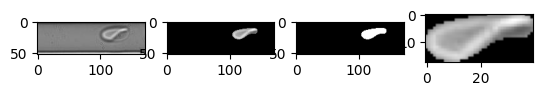


 44%|████▍     | 14279/32225 [01:24<02:05, 142.89it/s]

2



 47%|████▋     | 15194/32225 [01:27<00:56, 299.67it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.59it/s]


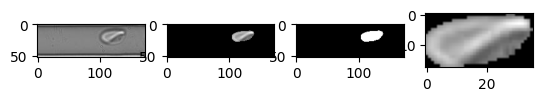


 47%|████▋     | 15252/32225 [01:27<02:00, 141.17it/s]

2



 48%|████▊     | 15369/32225 [01:28<01:13, 230.17it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


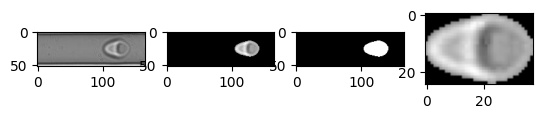


 48%|████▊     | 15426/32225 [01:29<02:03, 135.90it/s]

2



 48%|████▊     | 15578/32225 [01:29<01:05, 253.51it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


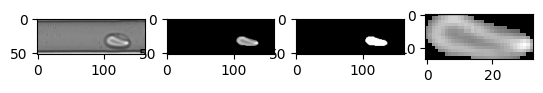


 49%|████▊     | 15635/32225 [01:30<01:58, 140.18it/s]

2



 49%|████▉     | 15796/32225 [01:30<01:02, 264.70it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


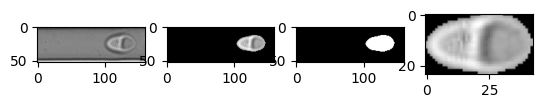


 49%|████▉     | 15857/32225 [01:31<01:49, 149.11it/s]

2



 49%|████▉     | 15887/32225 [01:31<01:33, 174.28it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


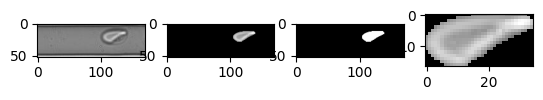


 49%|████▉     | 15943/32225 [01:32<02:08, 126.83it/s]

1



 52%|█████▏    | 16685/32225 [01:34<00:51, 303.84it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


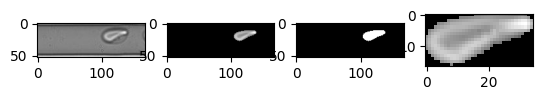


 52%|█████▏    | 16748/32225 [01:35<01:37, 159.42it/s]

1



 54%|█████▎    | 17310/32225 [01:37<00:51, 291.38it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


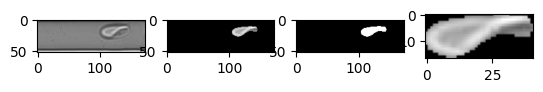


 54%|█████▍    | 17340/32225 [01:37<02:02, 121.60it/s]

1




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


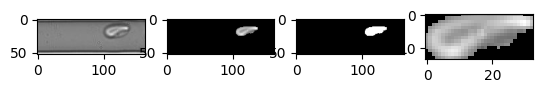


 54%|█████▍    | 17391/32225 [01:38<02:19, 106.51it/s]

2




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


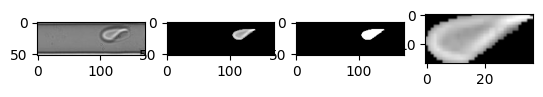


 54%|█████▍    | 17446/32225 [01:38<02:27, 100.13it/s]

1



 55%|█████▍    | 17653/32225 [01:39<00:57, 253.39it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


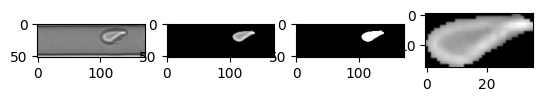


 55%|█████▍    | 17713/32225 [01:41<03:00, 80.51it/s]

1



 55%|█████▌    | 17772/32225 [01:41<01:53, 126.89it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


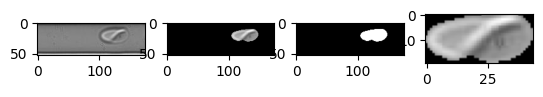


 55%|█████▌    | 17824/32225 [01:41<02:16, 105.20it/s]

2



 58%|█████▊    | 18656/32225 [01:44<00:47, 287.11it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.00it/s]


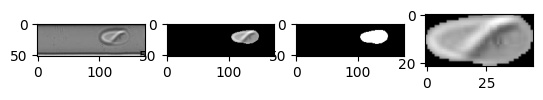


 58%|█████▊    | 18685/32225 [01:45<01:55, 117.46it/s]

2



 58%|█████▊    | 18743/32225 [01:45<01:20, 166.96it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


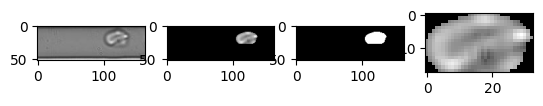


 58%|█████▊    | 18798/32225 [01:46<01:50, 121.34it/s]

2



 60%|██████    | 19373/32225 [01:48<00:40, 319.09it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


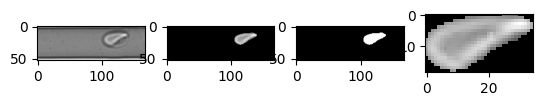


 60%|██████    | 19437/32225 [01:48<01:18, 163.37it/s]

1




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


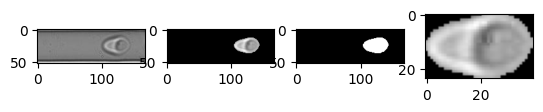


 60%|██████    | 19492/32225 [01:49<01:42, 124.57it/s]

2



 61%|██████    | 19556/32225 [01:49<01:09, 183.56it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


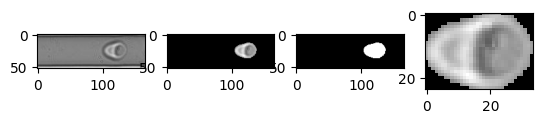


 61%|██████    | 19615/32225 [01:50<01:33, 135.00it/s]

2



 62%|██████▏   | 19859/32225 [01:51<00:44, 278.37it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.49it/s]


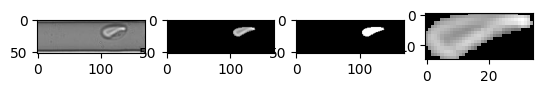


 62%|██████▏   | 19919/32225 [01:51<01:21, 150.26it/s]

1




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.83it/s]


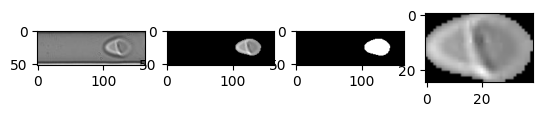


 62%|██████▏   | 19973/32225 [01:52<01:47, 114.47it/s]

2



 63%|██████▎   | 20351/32225 [01:53<00:39, 302.06it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


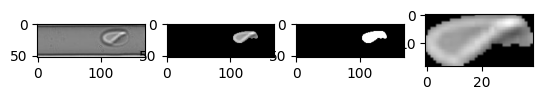


 63%|██████▎   | 20409/32225 [01:54<01:20, 147.01it/s]

2



 64%|██████▎   | 20468/32225 [01:54<00:59, 196.42it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.70it/s]


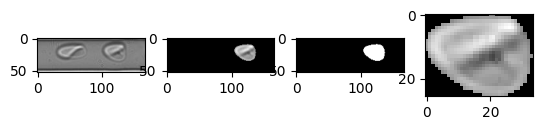


 64%|██████▎   | 20526/32225 [01:55<01:30, 129.81it/s]

2




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


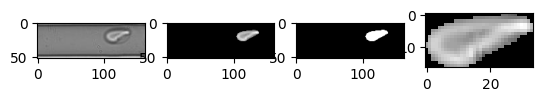


 64%|██████▍   | 20579/32225 [01:55<01:46, 109.51it/s]

1



 64%|██████▍   | 20662/32225 [01:56<01:04, 180.62it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.02it/s]


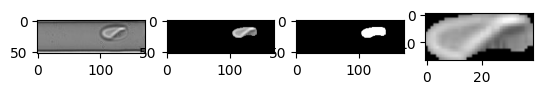


 64%|██████▍   | 20688/32225 [01:56<01:59, 96.85it/s] 

2




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


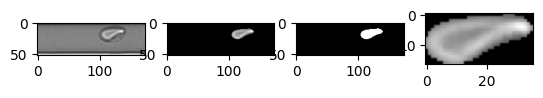


 64%|██████▍   | 20736/32225 [01:57<02:06, 91.12it/s]

1



 65%|██████▌   | 21048/32225 [01:58<00:38, 292.34it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


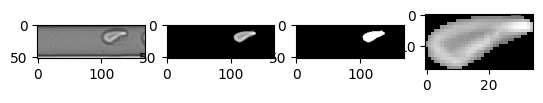


 66%|██████▌   | 21110/32225 [01:59<01:12, 153.49it/s]

1



 66%|██████▌   | 21267/32225 [01:59<00:40, 270.29it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


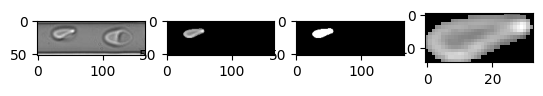


 66%|██████▌   | 21330/32225 [02:00<01:10, 155.31it/s]

1




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.37it/s]


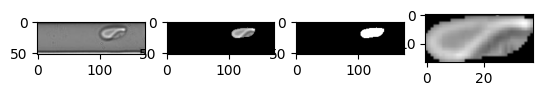


 66%|██████▋   | 21391/32225 [02:00<01:26, 124.99it/s]

2



 67%|██████▋   | 21454/32225 [02:01<00:59, 180.67it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


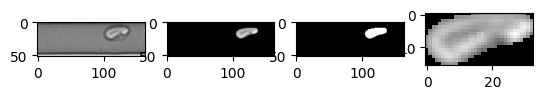


 67%|██████▋   | 21511/32225 [02:01<01:21, 131.78it/s]

1




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


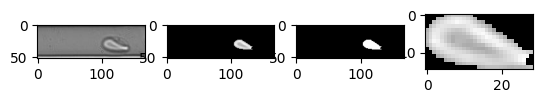


 67%|██████▋   | 21564/32225 [02:02<01:34, 112.73it/s]

2



 68%|██████▊   | 21815/32225 [02:03<00:36, 281.71it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.80it/s]


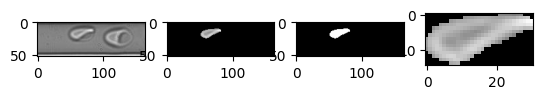


 68%|██████▊   | 21877/32225 [02:03<01:08, 151.49it/s]

1



 69%|██████▉   | 22341/32225 [02:05<00:34, 286.66it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.24it/s]


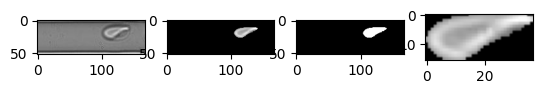


 70%|██████▉   | 22397/32225 [02:06<01:09, 141.58it/s]

1



 71%|███████   | 22725/32225 [02:07<00:31, 300.35it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


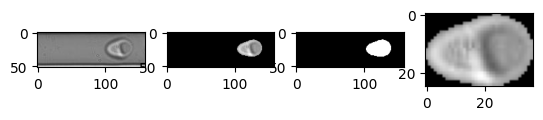


 71%|███████   | 22786/32225 [02:07<01:02, 151.69it/s]

2



 71%|███████   | 22818/32225 [02:08<00:52, 180.50it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


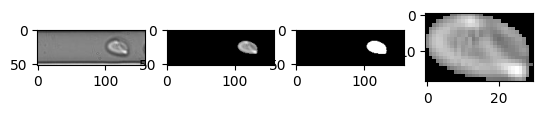


 71%|███████   | 22874/32225 [02:08<01:12, 128.33it/s]

2



 73%|███████▎  | 23500/32225 [02:10<00:32, 271.51it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.01it/s]


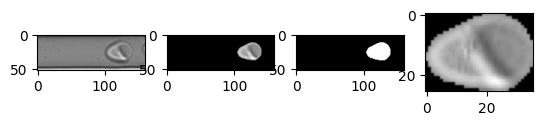


 73%|███████▎  | 23558/32225 [02:11<01:05, 131.76it/s]

2



 75%|███████▍  | 24081/32225 [02:13<00:31, 260.50it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  3.65it/s]


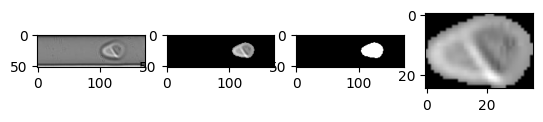


 75%|███████▍  | 24135/32225 [02:14<01:08, 118.79it/s]

2



 75%|███████▌  | 24253/32225 [02:14<00:36, 216.69it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.45it/s]


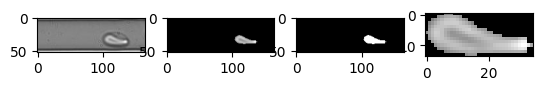


 75%|███████▌  | 24304/32225 [02:15<01:06, 118.45it/s]

1



 80%|████████  | 25838/32225 [02:21<00:24, 258.45it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


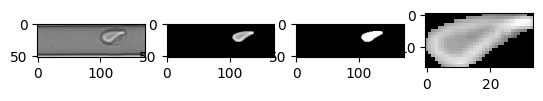


 80%|████████  | 25887/32225 [02:22<01:00, 105.63it/s]

1



 80%|████████  | 25911/32225 [02:22<00:50, 125.45it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


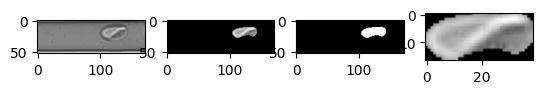


 81%|████████  | 25957/32225 [02:24<02:05, 49.99it/s]

2



 81%|████████  | 25982/32225 [02:24<01:34, 66.15it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.48it/s]


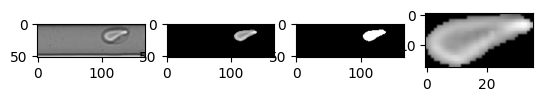


 81%|████████  | 26026/32225 [02:24<01:30, 68.87it/s]

1



 81%|████████▏ | 26262/32225 [02:25<00:26, 227.26it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


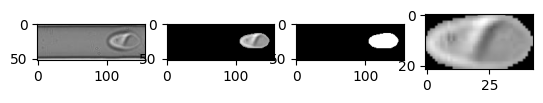


 82%|████████▏ | 26313/32225 [02:26<00:51, 114.44it/s]

2



 82%|████████▏ | 26442/32225 [02:27<00:27, 210.60it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


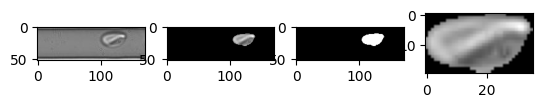


 82%|████████▏ | 26492/32225 [02:27<00:54, 105.64it/s]

2



 82%|████████▏ | 26520/32225 [02:28<00:43, 131.40it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.87it/s]


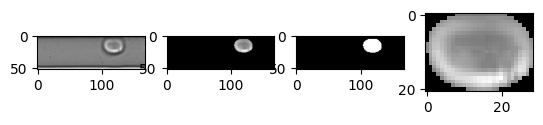


 82%|████████▏ | 26572/32225 [02:28<00:55, 101.54it/s]

2



 84%|████████▍ | 27115/32225 [02:30<00:17, 289.27it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.29it/s]


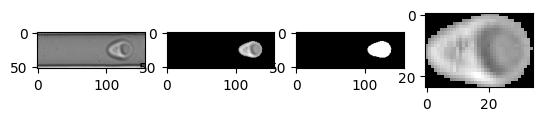


 84%|████████▍ | 27173/32225 [02:31<00:38, 130.59it/s]

2



 85%|████████▍ | 27318/32225 [02:31<00:20, 244.52it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


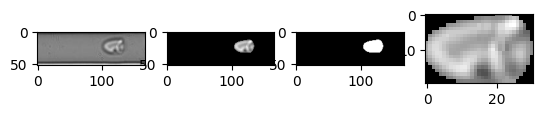


 85%|████████▍ | 27375/32225 [02:32<00:38, 124.86it/s]

2



 85%|████████▌ | 27551/32225 [02:33<00:18, 252.74it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


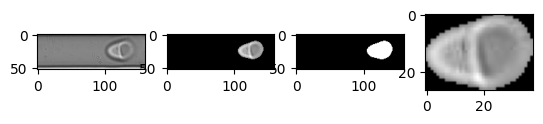


 86%|████████▌ | 27609/32225 [02:34<00:33, 137.65it/s]

2



 86%|████████▌ | 27696/32225 [02:34<00:21, 208.05it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


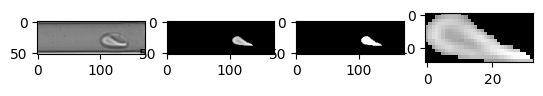


 86%|████████▌ | 27750/32225 [02:35<00:35, 127.74it/s]

1



 86%|████████▌ | 27776/32225 [02:35<00:29, 149.06it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.72it/s]


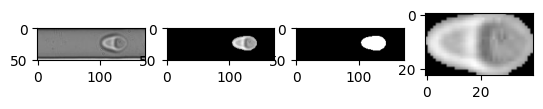


 86%|████████▋ | 27828/32225 [02:35<00:40, 107.83it/s]

2



 87%|████████▋ | 27917/32225 [02:36<00:22, 187.84it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


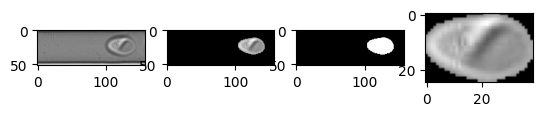


 87%|████████▋ | 27968/32225 [02:36<00:36, 118.18it/s]

2



 88%|████████▊ | 28252/32225 [02:37<00:14, 275.18it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


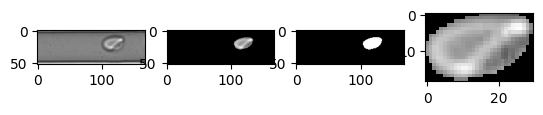


 88%|████████▊ | 28311/32225 [02:38<00:27, 140.95it/s]

2



 89%|████████▉ | 28705/32225 [02:39<00:11, 293.92it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.01it/s]


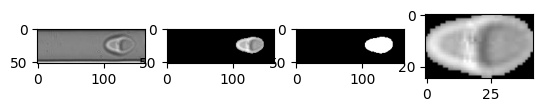


 89%|████████▉ | 28765/32225 [02:40<00:23, 146.83it/s]

2



 90%|█████████ | 29006/32225 [02:41<00:11, 280.25it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


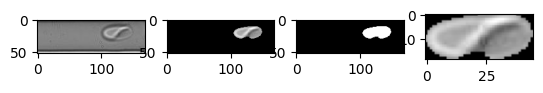


 90%|█████████ | 29066/32225 [02:42<00:21, 148.83it/s]

2



 90%|█████████ | 29092/32225 [02:42<00:18, 167.78it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


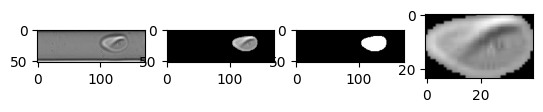


 90%|█████████ | 29144/32225 [02:42<00:28, 109.95it/s]

2




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.61it/s]


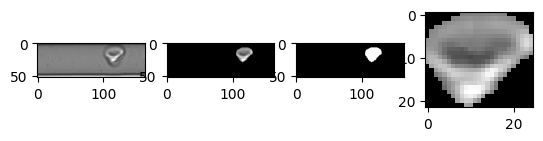


 91%|█████████ | 29191/32225 [02:43<00:33, 91.03it/s]

1



 91%|█████████ | 29251/32225 [02:43<00:20, 147.02it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.41it/s]


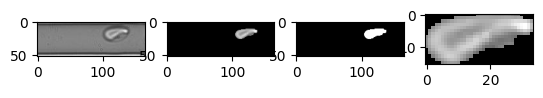


 91%|█████████ | 29302/32225 [02:44<00:26, 111.76it/s]

1



 91%|█████████ | 29328/32225 [02:44<00:21, 133.93it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.03it/s]


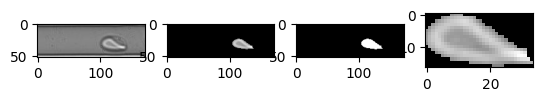


 91%|█████████ | 29381/32225 [02:45<00:28, 98.63it/s]

2



 92%|█████████▏| 29512/32225 [02:45<00:13, 204.37it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.37it/s]


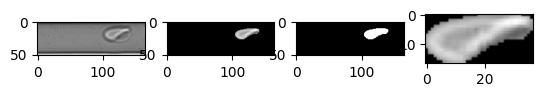


 92%|█████████▏| 29568/32225 [02:46<00:21, 124.28it/s]

1



 92%|█████████▏| 29718/32225 [02:47<00:10, 237.30it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


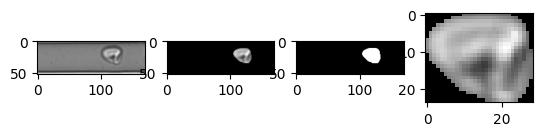


 92%|█████████▏| 29771/32225 [02:47<00:19, 125.72it/s]

2




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.07it/s]


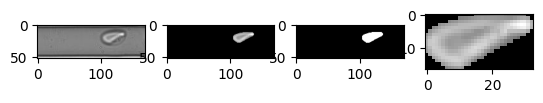


 93%|█████████▎| 29819/32225 [02:48<00:25, 93.15it/s]

1



 93%|█████████▎| 29982/32225 [02:49<00:09, 225.12it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.57it/s]


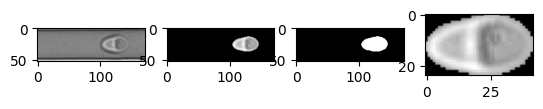


 93%|█████████▎| 30009/32225 [02:49<00:21, 103.55it/s]

2




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.66it/s]


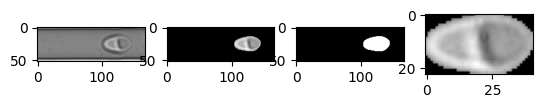


 93%|█████████▎| 30056/32225 [02:50<00:23, 91.72it/s]

2



 94%|█████████▎| 30169/32225 [02:50<00:10, 192.90it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


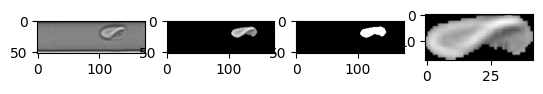


 94%|█████████▍| 30226/32225 [02:51<00:15, 130.21it/s]

2



 94%|█████████▍| 30256/32225 [02:51<00:12, 157.56it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


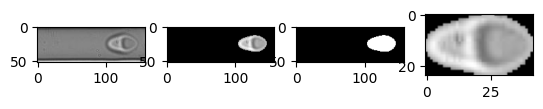


 94%|█████████▍| 30307/32225 [02:52<00:17, 112.65it/s]

2




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.50it/s]


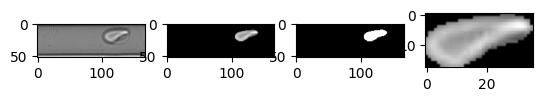


 94%|█████████▍| 30356/32225 [02:53<00:31, 59.48it/s]

1



 96%|█████████▌| 30777/32225 [02:55<00:05, 271.29it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.11it/s]


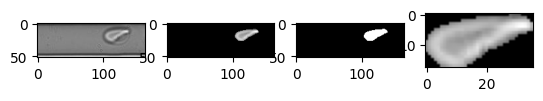


 96%|█████████▌| 30832/32225 [02:56<00:10, 136.86it/s]

1



 96%|█████████▌| 30861/32225 [02:56<00:08, 162.89it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


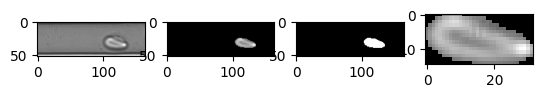


 96%|█████████▌| 30915/32225 [02:56<00:11, 119.02it/s]

2



 96%|█████████▋| 31064/32225 [02:57<00:04, 240.20it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


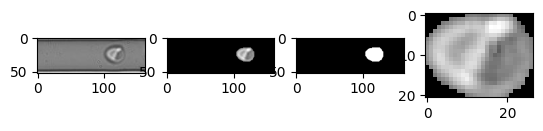


 97%|█████████▋| 31123/32225 [02:57<00:07, 139.29it/s]

2



 97%|█████████▋| 31303/32225 [02:58<00:03, 266.20it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.65it/s]


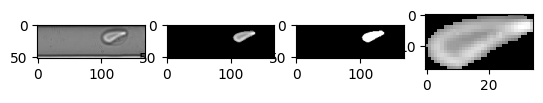


 97%|█████████▋| 31361/32225 [02:59<00:05, 148.12it/s]

1



 97%|█████████▋| 31393/32225 [02:59<00:04, 177.85it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.57it/s]


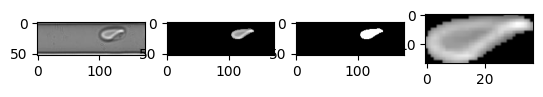


 98%|█████████▊| 31450/32225 [02:59<00:05, 130.40it/s]

1




  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


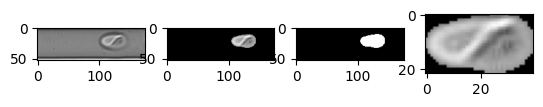


 98%|█████████▊| 31501/32225 [03:00<00:06, 106.94it/s]

2



 98%|█████████▊| 31531/32225 [03:00<00:05, 133.86it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.92it/s]


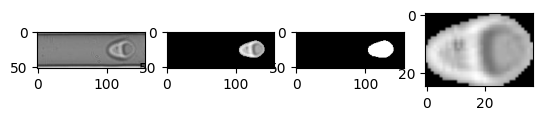


 98%|█████████▊| 31583/32225 [03:01<00:05, 108.21it/s]

2



 99%|█████████▉| 31911/32225 [03:02<00:01, 285.17it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


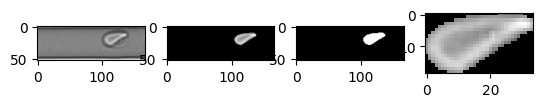


 99%|█████████▉| 31970/32225 [03:03<00:01, 147.06it/s]

1



 99%|█████████▉| 32033/32225 [03:03<00:00, 202.83it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


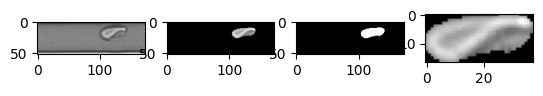


100%|█████████▉| 32090/32225 [03:04<00:01, 133.74it/s]

2



100%|██████████| 32225/32225 [03:04<00:00, 174.64it/s]


Processing complete!
Total object batches detected and cropped: 137
Output directory: /home/alex/dev/python/tx_rbc/tx_shared/data/videos/nouaman_2024/cropped_for_test
Background frame used: 21
Final state: Ready for new objects


In [70]:
#### import cv2
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image

OUTPUT_DIR_cropped = os.path.join(cfg.paths.root_abs, cfg.paths.nouaman_videos_from_root, "cropped_for_test")
OUTPUT_DIR_cropped_images = os.path.join(OUTPUT_DIR_cropped, "images")
OUTPUT_DIR_cropped_labels = os.path.join(OUTPUT_DIR_cropped, "labels")
os.makedirs(OUTPUT_DIR_cropped, exist_ok=True)
os.makedirs(OUTPUT_DIR_cropped_images, exist_ok=True)
os.makedirs(OUTPUT_DIR_cropped_labels, exist_ok=True)

# ─────────────────────────────────────────────────────────────────────────────────
# PARAMETERS
#BACKGROUND_FRAME_IDX = -1              # Frame index to use as background (from frame viewer)
#🔥 TO SET at the top of this notebook

# Detection parameters
DIFF_THRESH = 20                       # Per-pixel difference threshold (0-255)
MIN_CONTOUR_AREA = 100                 # Minimum area for detected objects
MAX_CONTOUR_AREA = 1000                # Maximum area for detected objects
MARGIN_X = 10                         # Extra pixels to pad left/right when cropping
MARGIN_Y = 10                          # Extra pixels to pad top/bottom when cropping
PADDING = 100

# Morphological operations parameters
MORPH_KERNEL_SIZE = 5                  # Size of morphological kernel
CLOSE_ITERATIONS = 2                   # Iterations for morphological closing
OPEN_ITERATIONS = 1                    # Iterations for morphological opening

# Processing parameters
SKIP_FRAMES = 1                        # Process every N frames (1 = process all)
MAX_OBJECTS = None                     # Maximum number of objects to detect
EDGE_BUFFER_COLS = 20                  # Minimum columns of background needed at left/right edges
# ─────────────────────────────────────────────────────────────────────────────────


def preprocess_mask(mask, kernel_size=5, close_iter=2, open_iter=1):
    """Apply morphological operations to clean up the binary mask"""
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    
    # Close small gaps
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=close_iter)
    
    # Remove small noise
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=open_iter)
    
    return mask

def check_object_fully_entered(frame, background, bbox, edge_buffer_cols, diff_thresh):
    """Check if object is fully entered by verifying edge columns are background-like"""
    x0, y0, x1, y1 = bbox
    h, w = frame.shape[:2]
    
    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_bg = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
    
    # Check left edge buffer
    left_buffer_start = max(0, x0 - edge_buffer_cols)
    left_buffer_end = x0
    if left_buffer_end > left_buffer_start:
        left_region_frame = gray_frame[y0:y1, left_buffer_start:left_buffer_end]
        left_region_bg = gray_bg[y0:y1, left_buffer_start:left_buffer_end]
        left_diff = cv2.absdiff(left_region_frame, left_region_bg)
        left_mean_diff = np.mean(left_diff)
        if left_mean_diff > diff_thresh * 0.5:  # Half threshold for edge checking
            return False, "left_edge_not_clear"
    
    # Check right edge buffer  
    right_buffer_start = x1
    right_buffer_end = min(w, x1 + edge_buffer_cols)
    if right_buffer_end > right_buffer_start:
        right_region_frame = gray_frame[y0:y1, right_buffer_start:right_buffer_end]
        right_region_bg = gray_bg[y0:y1, right_buffer_start:right_buffer_end]
        right_diff = cv2.absdiff(right_region_frame, right_region_bg)
        right_mean_diff = np.mean(right_diff)
        if right_mean_diff > diff_thresh * 0.5:  # Half threshold for edge checking
            return False, "right_edge_not_clear"
    
    # Check if object is too close to frame edges
    if x0 < edge_buffer_cols:
        return False, "too_close_to_left_edge"
    if x1 > (w - edge_buffer_cols):
        return False, "too_close_to_right_edge"
    
    return True, "fully_entered"

def detect_and_crop_objects(frame, background, frame_idx, output_dir,
                           diff_thresh=30, min_area=100, max_area=50000,
                           margin_x=10, margin_y=10, save_objects=True):
    """Detect objects by comparing frame to background and optionally crop them"""
    
    h, w = frame.shape[:2]
    
    # Convert to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_bg = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
    
    # Compute absolute difference
    diff = cv2.absdiff(gray_frame, gray_bg)
    
    # Apply threshold to create binary mask
    _, mask = cv2.threshold(diff, diff_thresh, 255, cv2.THRESH_BINARY)
    
    # Clean up the mask with morphological operations
    mask = preprocess_mask(mask, MORPH_KERNEL_SIZE, CLOSE_ITERATIONS, OPEN_ITERATIONS)
    
    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    detected_objects = []
    valid_contours = []
    
    # Filter contours by area and extract bounding boxes
    for contour in contours:
        area = cv2.contourArea(contour)
        if min_area <= area <= max_area:
            valid_contours.append(contour)
    
    # Sort contours by area (largest first)
    valid_contours.sort(key=cv2.contourArea, reverse=True)
    
    for i, contour in enumerate(valid_contours):
        # Get bounding rectangle
        x, y, box_w, box_h = cv2.boundingRect(contour)
        
        # Add margins
        x0_crop = max(0, x)
        y0_crop = 0
        x1_crop = min(w, x + box_w)
        y1_crop = h

        x0_pad = max(0, x - PADDING)
        y0_pad = 0
        x1_pad = min(w, x + box_w + 2*PADDING)
        y1_pad = h
        
        # Store object info (always do this for detection logic)
        detected_objects.append({
            'bbox_pad': (x0_pad, y0_pad, x1_pad, y1_pad),
            'bbox': (x0_crop, y0_crop, x1_crop, y1_crop),
            'area': cv2.contourArea(contour)
        })
        
        # Only save if requested (controlled by the main loop logic)
        if save_objects:
            cropped = frame[y0_crop:y1_crop, x0_crop:x1_crop]
            
            if cropped.size > 0:  # Make sure crop is valid
                # Save the cropped object
                filename = f"object_frame_{frame_idx:05d}_obj_{i+1:02d}.png"
                filepath = os.path.join(output_dir, filename)
                cv2.imwrite(filepath, cropped)
                
                detected_objects[-1]['filename'] = filename
    
    return detected_objects, mask

def main():
    # Create output directory
    os.makedirs(OUTPUT_DIR_cropped, exist_ok=True)
    
    # Open video
    cap = cv2.VideoCapture(VIDEO_PATH)
    if not cap.isOpened():
        raise RuntimeError(f"Could not open {VIDEO_PATH!r}")
    
    nb_total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Video has {nb_total_frames} frames")
    
    # Read background frame
    cap.set(cv2.CAP_PROP_POS_FRAMES, BACKGROUND_FRAME_IDX)
    ret, background_frame = cap.read()
    if not ret:
        raise RuntimeError(f"Failed to read background frame {BACKGROUND_FRAME_IDX}")
    
    # Save background reference
    bg_ref_path = os.path.join(OUTPUT_DIR_cropped, f"background_reference_frame_{BACKGROUND_FRAME_IDX:05d}.png")
    #cv2.imwrite(bg_ref_path, background_frame)
    #print(f"Background reference saved: {bg_ref_path}")
    
    # Process all frames with state tracking
    batch_count = 0
    frame_idx = 0
    waiting_for_clear_frame = False  # State: True = wait for no objects, False = can save objects
    
    print(f"Processing frames with parameters:")
    print(f"  Difference threshold: {DIFF_THRESH}")
    print(f"  Min contour area: {MIN_CONTOUR_AREA}")
    print(f"  Max contour area: {MAX_CONTOUR_AREA}")
    print(f"  Skip frames: {SKIP_FRAMES}")
    print(f"  Edge buffer columns: {EDGE_BUFFER_COLS}")
    print(f"  Logic: Save only fully entered objects, then wait for clear frame")
    print()

    pbar = tqdm(total=nb_total_frames)
    while frame_idx < nb_total_frames and (MAX_OBJECTS is not None and batch_count < MAX_OBJECTS or MAX_OBJECTS is None):
        # Read frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()
        if not ret:
            break
        
        # Skip frames if specified
        if frame_idx % SKIP_FRAMES != 0:
            frame_idx += 1
            continue
        
        # Detect objects (but don't necessarily save them yet)
        detected_objects, debug_mask = detect_and_crop_objects(
            frame, background_frame, frame_idx, OUTPUT_DIR_cropped,
            DIFF_THRESH, MIN_CONTOUR_AREA, MAX_CONTOUR_AREA,
            MARGIN_X, MARGIN_Y, save_objects=False  # Don't save yet, we'll control this
        )
        
        # Filter objects to only include those fully entered
        fully_entered_objects = []
        for obj_info in detected_objects:
            is_fully_entered, reason = check_object_fully_entered(
                frame, background_frame, obj_info['bbox'], EDGE_BUFFER_COLS, DIFF_THRESH
            )
            if is_fully_entered:
                fully_entered_objects.append(obj_info)
        
        objects_found = len(fully_entered_objects) > 0
        
        if objects_found and not waiting_for_clear_frame:
            # New objects detected and we're allowed to save → save them
            for i, obj_info in enumerate(fully_entered_objects):
                # Re-crop and save the object
                x0_pad, y0_pad, x1_pad, y1_pad = obj_info['bbox_pad']
                cropped = frame[y0_pad:y1_pad, x0_pad:x1_pad]

                x0, y0, x1, y1 = obj_info['bbox']
                x0 -= x0_pad
                y0 += MARGIN_Y
                x1 -= x0_pad
                y1 -= MARGIN_Y
                extracted_cell = cv2.cvtColor(cropped[y0:y1, x0:x1], cv2.COLOR_BGR2GRAY)

                if cropped.size > 0 and extracted_cell.size > 0 and (x1-x0 < 50) and (x1_pad-x0_pad < 176):  

                    mask = cellpose.SegmentImages([cropped], diameter=40)[0]

                    nb_saved_objects = 0
                    filename = f"video_{VIDEO_NAME}_cell_{batch_count:03d}_frame_{frame_idx:05d}_obj_{i+1:02d}"
                    filepath = os.path.join(OUTPUT_DIR_cropped_images, filename + ".png")
                    
                    for mask_label in np.unique(mask):
                        if mask_label == 0:continue # background
                        mask = np.where(mask == mask_label, mask, 0)
    
                        
                        # Remove black padding
                        image = Image.fromarray(cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY) * np.array(mask > 0))
                        imageBox = image.getbbox()
                        if imageBox is None:continue
                        img = np.array(image.crop(imageBox))
                        crop_x0, crop_y0, crop_x1, crop_y1 = imageBox
                        
                        # Adjust the original bounding box
                        """
                        new_x0 = x0 + crop_x0
                        new_y0 = y0 + crop_y0
                        new_x1 = x0 + crop_x1
                        new_y1 = y0 + crop_y1
                        x0, y0, x1, y1 = new_x0, new_y0, new_x1, new_y1
                        """
                        x0, y0, x1, y1 = crop_x0, crop_y0, crop_x1, crop_y1

                        if x1-x0 > 80:continue # likely not a cell
    
                            
                        if CELL_TYPE == 'slipper':
                            
                            nonzero_pixels = np.count_nonzero(img) # Count non-zero pixels
                            total_pixels = img.shape[0] * img.shape[1] # To Calculate percentage below
                            nonzero_percent = (nonzero_pixels / total_pixels) * 100
                            nonzero_top = np.count_nonzero(img[:img.shape[0]//2 + 1]) # Include middle row in top half
                            nonzero_bottom = np.count_nonzero( img[img.shape[0]//2 + 1:])
                            nonzero_left =  np.count_nonzero(img[:,:img.shape[1]//2 + 1]) # Include middle row in top half
                            nonzero_right =  np.count_nonzero(img[:,img.shape[1]//2 + 1:])
                
                            ratio_top = nonzero_top / nonzero_pixels
                            ratio_bot = nonzero_bottom / nonzero_pixels
                            ratio_left = nonzero_left / nonzero_pixels
                            ratio_right = nonzero_right / nonzero_pixels
                            good_LR_ratio = False
                            if ORIENTATION == 'L':
                                good_LR_ratio = ratio_left > ratio_right
                            else:
                                good_LR_ratio = ratio_left < ratio_right
                            
                            # Check if image meets threshold
                            if nonzero_percent < SLIPPER_THRESHOLD_PERCENT and nonzero_pixels < SLIPPER_ABS_NB_NZ_PIXELS and \
                                abs(ratio_top - ratio_bot) > SLIPPER_THRESHOLD_RATIO and good_LR_ratio:
                                label='1'
                            else:
                                label='2'
                        else:
                            
                            nonzero_pixels = np.count_nonzero(img) # Count non-zero pixels
                            total_pixels = img.shape[0] * img.shape[1] # To Calculate percentage below
                            nonzero_percent = (nonzero_pixels / total_pixels) * 100
                            nonzero_top = np.count_nonzero(img[:img.shape[0]//2 + 1]) # Include middle row in top half
                            nonzero_bottom = np.count_nonzero( img[img.shape[0]//2 + 1:])
                            nonzero_left =  np.count_nonzero(img[:,:img.shape[1]//2 + 1]) # Include middle row in top half
                            nonzero_right =  np.count_nonzero(img[:,img.shape[1]//2 + 1:])            
                            ratio_top = nonzero_top / nonzero_pixels
                            ratio_bot = nonzero_bottom / nonzero_pixels
                            ratio_left = nonzero_left / nonzero_pixels
                            ratio_right = nonzero_right / nonzero_pixels
                            good_LR_ratio = False
                            if ORIENTATION == 'L':
                                good_LR_ratio = ratio_left < ratio_right
                            else:
                                good_LR_ratio = ratio_left > ratio_right
                            
                            # Check if image meets threshold
                            if nonzero_pixels > CROISSANT_ABS_NB_NZ_PIXELS_MIN and \
                                abs(ratio_top - ratio_bot) < CROISSANT_THRESHOLD_RATIO:# and good_LR_ratio:
                                label='0'
                            else:
                                label='2'
    

                        
                        plt.figure()
                        plt.subplot(141)
                        plt.imshow(cropped, cmap='gray')
                        plt.subplot(142)
                        plt.imshow(Image.fromarray(cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY) * np.array(mask > 0)), cmap='gray')
                        plt.subplot(143)
                        plt.imshow(mask, cmap='gray')
                        plt.subplot(144)
                        plt.imshow(img, cmap='gray')
                        plt.show()
                        print(label)
                            
                        batch_count += 1
    
                        bbox_yolo = fullsize_bbox_to_yolo_bbox((x0, y0, x1, y1), cropped.shape[1], cropped.shape[0])
                        if bbox_yolo is None:continue
                        with open(os.path.join(OUTPUT_DIR_cropped_labels, f'{filename}.txt'), "a") as label_file:
                            label_file.write(f"{label} {bbox_yolo[0]:.6f} {bbox_yolo[1]:.6f} {bbox_yolo[2]:.6f} {bbox_yolo[3]:.6f}\n")
                        nb_saved_objects += 1

                    if nb_saved_objects > 0:
                        cv2.imwrite(filepath, cropped)
                        
            waiting_for_clear_frame = True
            
        elif not objects_found and waiting_for_clear_frame:
            waiting_for_clear_frame = False
        
        frame_idx += SKIP_FRAMES

        pbar.update()

    pbar.close()
    cap.release()
    
    print(f"\nProcessing complete!")
    print(f"Total object batches detected and cropped: {batch_count}")
    print(f"Output directory: {OUTPUT_DIR_cropped}")
    print(f"Background frame used: {BACKGROUND_FRAME_IDX}")
    print(f"Final state: {'Waiting for clear frame' if waiting_for_clear_frame else 'Ready for new objects'}")

if __name__ == "__main__":
    main()

# File filtering

In [68]:
def get_basenames(folder):
    """Return a set of basenames (without extensions) from a folder."""
    return {os.path.splitext(f)[0] for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))}

def remove_unmatched_files(folder_a, folder_b):
    basenames_a = get_basenames(folder_a)
    for filename in os.listdir(folder_b):
        full_path = os.path.join(folder_b, filename)
        if os.path.isfile(full_path):
            basename = os.path.splitext(filename)[0]
            if basename not in basenames_a:
                print(f"Removing: {filename}")
                os.remove(full_path)

remove_unmatched_files(OUTPUT_DIR_cropped_images, OUTPUT_DIR_cropped_labels)

Removing: video_0100_mbar_050_fps_20200530_155822.avi_cell_042_frame_14314_obj_01.txt
Removing: video_0100_mbar_100_fps.avi_cell_016_frame_17532_obj_01.txt
Removing: video_0100_mbar_100_fps_20200527_140344.avi_cell_059_frame_13187_obj_01.txt
Removing: video_0100_mbar_050_fps_20200530_155822.avi_cell_091_frame_24117_obj_01.txt
Removing: video_0100_mbar_050_fps_20200530_155822.avi_cell_065_frame_17053_obj_02.txt
Removing: video_0100_mbar_050_fps_20200530_155822.avi_cell_083_frame_19938_obj_01.txt
Removing: video_0100_mbar_050_fps_20200530_155822.avi_cell_047_frame_14775_obj_01.txt
Removing: video_0100_mbar_100_fps_20200527_140344.avi_cell_058_frame_12981_obj_01.txt
Removing: video_0100_mbar_100_fps_20200527_140344.avi_cell_026_frame_06304_obj_01.txt
Removing: video_0100_mbar_050_fps_20200530_155822.avi_cell_045_frame_14409_obj_01.txt
Removing: video_0100_mbar_100_fps_20200527_140344.avi_cell_025_frame_05730_obj_01.txt
Removing: video_0100_mbar_050_fps_20200530_155822.avi_cell_092_frame_2